# Employment by category vs online purchases

Looking at changes in local stores (establishments) vs online purchases, comparing business category (by NAICS code) and product category by states.


Hypothesis: 
There is a negative correlation between change in online purchases for category X and change in employment at establishments of NAICS/category X.


#### Categories of interest to study:
Criteria for choosing:
- Clear dilineation of categories with alignment between NAICS categories and Amazon categories
- Reason to believe online and offline retail are substitutes

Categories:

- Books stores
    - For 2018-2018: hypothesis validated (p<0.05)
- Shoes stores
    - For 2018-2018: hypothesis validated (p<0.05)

No stat. significant result:
- Pet supplies
    - there is an overall increase in employment and we expect online and offline retail are complementary
    
- years 2019-2020 and 2020-2021
    
Not studying
- Paint and wallpaper 
    - not enough online purchases (most paint purchases in our Amazon data for arts and crafts)
- Electronics
    - ideas for why this didn't work:
    - no clear delineation of category -- included tens of subcategories
    - overlaps with other NAICS codes -- office supplies, used electronics, toys and games (video game is a big category)
    - while book stores and shoes stores clearly have products that people previously needed to buy in stores and can now buy online, there are more and more NEW types of electronics to buy and therefore there is not as clearly a transfer of where specific items are being purchased.

In [1]:
from datetime import date, datetime
import os

from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import pearsonr, spearmanr

# For Amazon data, make easier to access col names by defining here
RESPONSE_ID = 'Survey ResponseID'
DATE = 'Order Date'
UNIT_PRICE = 'Purchase Price Per Unit'
QUANTITY = 'Quantity'
STATE = 'Shipping Address State'
TITLE = 'Title'
PRODUCT_CODE = 'ASIN/ISBN (Product Code)'
CATEGORY = 'Category'

# Additional / added columns
YEAR = 'year'

census_data_dir = '../data/census/'

## Load in the states data
For matching to Census data.

In [2]:
states_df = pd.read_csv(census_data_dir + 'state-abbreviations.csv')
states_df.head(3)

,state,abbrev,code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ


## Census data

Census data are from 
Statistics of U.S. Businesses (SUSB)
https://www.census.gov/programs-surveys/susb/technical-documentation/methodology.html

Data are downloaded from https://www.census.gov/programs-surveys/susb/data/tables.html

I compiled data for each year, pulling out NAICS codes of interest, in spreadsheets: [link](https://drive.google.com/drive/folders/1GHoqLHU_E15pYApe1G4JAKNXd58J_0PJ?usp=sharing).

I normalized employment changes by population changes by first pulling population data for each year from NST-EST2020 and EST2022. [Population data are here](https://docs.google.com/spreadsheets/d/1_YEiBzyt8BtOl8oPYZ51cZN3SpmBk9QIcerPq6OM0PY/edit?usp=sharing).
I calculated employment/population for each year and then calculated percent change in employment.

i.e. metric of interest is percent change in employment from 2018 to 2019:

```
= [(employment2019/population2019) - (employment2018/population2018)]/(employment2018/population2018)
```


In [3]:
def read_susb_data(fname):
    df = pd.read_csv(census_data_dir + 'SUSB/' + fname)
    # Drop United States total
    df = df.drop(0)
    df['state code'] = df['State Name'].map(states_df.set_index('state')['code'])
    # Index and order by state code to match purchases data
    df = df.set_index('state code').sort_index()
    return df

#### Read in books census data

In [4]:
census_books_stores = read_susb_data('books-stores-aggregated.csv')[[
    '2018-2019 employment/population percent change',
    '2019-2020 employment/population percent change',
    '2020-2021 employment/population percent change',
    
    '2018-2021 establishments percent change',
    '2019-2021 establishments percent change',
    
    '2018-2019 Establishments percent change',
    '2019-2020 Establishments percent change',
    '2018-2019 Employment percent change',
    '2019-2020 Employment percent change',
    # Also have data specific to enterprise size
    'Enterprise size <500 employees: 2018-2019 employment/population percent change',
    'Enterprise size <20 employees: 2018-2019 employment/population percent change',
]]
census_books_stores.head(3)

,2018-2019 employment/population percent change,2019-2020 employment/population percent change,2020-2021 employment/population percent change,2018-2021 establishments percent change,2019-2021 establishments percent change,2018-2019 Establishments percent change,2019-2020 Establishments percent change,2018-2019 Employment percent change,2019-2020 Employment percent change,Enterprise size <500 employees: 2018-2019 employment/population percent change,Enterprise size <20 employees: 2018-2019 employment/population percent change
state code,,,,,,,,,,,
AK,-0.202443,0.154928,-0.201372,-0.111111,0.043478,-0.148148,0.173913,-0.258993,0.131250,-0.277525,-0.359442
AL,-0.146290,-0.005125,-0.168531,-0.196262,-0.188679,-0.009346,-0.113208,-0.167458,-0.002381,-0.135834,-0.187112
AR,-0.008676,-0.108764,-0.175886,-0.157303,-0.127907,-0.033708,-0.116279,-0.005806,-0.118506,0.015208,0.095383


Pull out columns of interest and compare

BEWARE the metrics you use!

- metrics have low correlation if any
- year to year changes negatively correlated
- change in employment low positive correlation with change in establishments

In [5]:
census_books_stores.corr()

,2018-2019 employment/population percent change,2019-2020 employment/population percent change,2020-2021 employment/population percent change,2018-2021 establishments percent change,2019-2021 establishments percent change,2018-2019 Establishments percent change,2019-2020 Establishments percent change,2018-2019 Employment percent change,2019-2020 Employment percent change,Enterprise size <500 employees: 2018-2019 employment/population percent change,Enterprise size <20 employees: 2018-2019 employment/population percent change
2018-2019 employment/population percent change,1.000000,-0.041061,-0.000899,0.177990,0.066940,0.216737,-0.073798,0.992434,-0.057756,0.635306,0.334797
2019-2020 employment/population percent change,-0.041061,1.000000,-0.273885,0.139491,0.196106,-0.079443,0.225837,-0.077472,0.973918,-0.179528,-0.145611
2020-2021 employment/population percent change,-0.000899,-0.273885,1.000000,0.005089,0.105421,-0.184748,-0.099431,-0.003227,-0.281944,0.006714,0.154618
2018-2021 establishments percent change,0.177990,0.139491,0.005089,1.000000,0.861762,0.360912,0.552475,0.173148,0.145363,0.268970,0.052238
2019-2021 establishments percent change,0.066940,0.196106,0.105421,0.861762,1.000000,-0.159276,0.765012,0.038105,0.222741,0.044300,-0.139635
2018-2019 Establishments percent change,0.216737,-0.079443,-0.184748,0.360912,-0.159276,1.000000,-0.319861,0.260161,-0.117258,0.437304,0.348661
2019-2020 Establishments percent change,-0.073798,0.225837,-0.099431,0.552475,0.765012,-0.319861,1.000000,-0.123347,0.250796,-0.103250,-0.300708
2018-2019 Employment percent change,0.992434,-0.077472,-0.003227,0.173148,0.038105,0.260161,-0.123347,1.000000,-0.092615,0.661600,0.352816
2019-2020 Employment percent change,-0.057756,0.973918,-0.281944,0.145363,0.222741,-0.117258,0.250796,-0.092615,1.000000,-0.201326,-0.177107
Enterprise size <500 employees: 2018-2019 employment/population percent change,0.635306,-0.179528,0.006714,0.268970,0.044300,0.437304,-0.103250,0.661600,-0.201326,1.000000,0.443595


In [6]:
# Pull out columns of interest -- maybe don't need this?
# only used in experiment at the end of notebook
census_books_est_pct_change_20182019 = census_books_stores['2018-2019 Establishments percent change']
census_books_est_pct_change_20192020 = census_books_stores['2019-2020 Establishments percent change']
census_books_emp_pct_change_20182019 = census_books_stores['2018-2019 employment/population percent change']
census_books_emp_pct_change_20192020 = census_books_stores['2019-2020 employment/population percent change']
census_books_emp_pct_change_20202021 = census_books_stores['2020-2021 employment/population percent change']

census_books_lt_500_emp_pct_change_20182019 = census_books_stores['Enterprise size <500 employees: 2018-2019 employment/population percent change']
census_books_lt_20_emp_pct_change_20182019 = census_books_stores['Enterprise size <20 employees: 2018-2019 employment/population percent change']

census_books_est_pct_change_20182019.head()

state code
AK   -0.148148
AL   -0.009346
AR   -0.033708
AZ   -0.008065
CA    0.000000
Name: 2018-2019 Establishments percent change, dtype: float64

#### Read in shoe stores census data

For shoe stores, employment and establishments data more correlated than for book stores.

Negative correlations across years.

In [7]:
census_shoe_stores = read_susb_data('shoe-stores-aggregated.csv')[[
    '2018-2019 employment/population percent change',
    '2019-2020 employment/population percent change',
    '2020-2021 employment/population percent change',
    
    '2018-2021 establishments percent change',
    '2019-2021 establishments percent change',
    
    '2018-2019 Establishments percent change',
    '2019-2020 Establishments percent change',
    '2018-2019 Employment percent change',
    '2019-2020 Employment percent change',
    # Also have data specific to enterprise size
    'Enterprise size <500 employees: 2018-2019 employment/population percent change',
    'Enterprise size <20 employees: 2018-2019 employment/population percent change',
]]
census_shoe_stores.head(3)

,2018-2019 employment/population percent change,2019-2020 employment/population percent change,2020-2021 employment/population percent change,2018-2021 establishments percent change,2019-2021 establishments percent change,2018-2019 Establishments percent change,2019-2020 Establishments percent change,2018-2019 Employment percent change,2019-2020 Employment percent change,Enterprise size <500 employees: 2018-2019 employment/population percent change,Enterprise size <20 employees: 2018-2019 employment/population percent change
state code,,,,,,,,,,,
AK,0.057181,-0.128369,-0.130383,-0.228571,-0.250000,0.028571,-0.027778,0.050193,-0.151111,0.123875,0.127431
AL,0.054312,-0.109779,0.059620,-0.105405,-0.080556,-0.027027,-0.013889,0.054672,-0.120220,-0.062692,-0.089002
AR,0.060846,-0.111487,0.011674,-0.190955,-0.190955,0.000000,-0.025126,0.060109,-0.121935,-0.021734,-0.099859


In [8]:
census_shoe_stores.corr()

,2018-2019 employment/population percent change,2019-2020 employment/population percent change,2020-2021 employment/population percent change,2018-2021 establishments percent change,2019-2021 establishments percent change,2018-2019 Establishments percent change,2019-2020 Establishments percent change,2018-2019 Employment percent change,2019-2020 Employment percent change,Enterprise size <500 employees: 2018-2019 employment/population percent change,Enterprise size <20 employees: 2018-2019 employment/population percent change
2018-2019 employment/population percent change,1.000000,-0.293430,0.160168,0.550531,0.252217,0.546644,-0.067856,0.987648,-0.337143,0.183909,0.147873
2019-2020 employment/population percent change,-0.293430,1.000000,-0.139665,0.297528,0.497071,-0.269233,0.286381,-0.270753,0.992687,0.027734,0.299174
2020-2021 employment/population percent change,0.160168,-0.139665,1.000000,0.327389,0.419842,-0.085007,0.001290,0.175978,-0.122611,-0.196071,-0.239499
2018-2021 establishments percent change,0.550531,0.297528,0.327389,1.000000,0.812580,0.433675,-0.125875,0.544929,0.283635,-0.051952,0.000213
2019-2021 establishments percent change,0.252217,0.497071,0.419842,0.812580,1.000000,-0.172179,0.169030,0.245703,0.488014,-0.082427,-0.012516
2018-2019 Establishments percent change,0.546644,-0.269233,-0.085007,0.433675,-0.172179,1.000000,-0.466332,0.548621,-0.279487,0.036012,0.025754
2019-2020 Establishments percent change,-0.067856,0.286381,0.001290,-0.125875,0.169030,-0.466332,1.000000,-0.041917,0.274604,0.042038,-0.024941
2018-2019 Employment percent change,0.987648,-0.270753,0.175978,0.544929,0.245703,0.548621,-0.041917,1.000000,-0.308751,0.140001,0.154044
2019-2020 Employment percent change,-0.337143,0.992687,-0.122611,0.283635,0.488014,-0.279487,0.274604,-0.308751,1.000000,0.006106,0.280784
Enterprise size <500 employees: 2018-2019 employment/population percent change,0.183909,0.027734,-0.196071,-0.051952,-0.082427,0.036012,0.042038,0.140001,0.006106,1.000000,0.431340


In [9]:
# Pull out columns of interest
census_shoes_est_pct_change_20182019 = census_shoe_stores['2018-2019 Establishments percent change']
census_shoes_est_pct_change_20192020 = census_shoe_stores['2019-2020 Establishments percent change']
# census_shoes_emp_pct_change_20182019 = census_shoe_stores['2018-2019 Employment percent change']
# census_shoes_emp_pct_change_20192020 = census_shoe_stores['2019-2020 Employment percent change']
census_shoes_emp_pct_change_20182019 = census_shoe_stores['2018-2019 employment/population percent change']
census_shoes_emp_pct_change_20192020 = census_shoe_stores['2019-2020 employment/population percent change']
census_shoes_emp_pct_change_20202021 = census_shoe_stores['2019-2020 employment/population percent change']

census_shoes_lt_500_emp_pct_change_20182019 = census_shoe_stores['Enterprise size <500 employees: 2018-2019 employment/population percent change']
census_shoes_lt_20_emp_pct_change_20182019 = census_shoe_stores['Enterprise size <20 employees: 2018-2019 employment/population percent change']

census_shoes_emp_pct_change_20182019.head()

state code
AK    0.057181
AL    0.054312
AR    0.060846
AZ   -0.159494
CA   -0.092635
Name: 2018-2019 employment/population percent change, dtype: float64

#### Read in supermarkets and grocery stores census data


In [10]:
census_grocery_stores = read_susb_data('grocery-stores-aggregated.csv')[[
    '2018-2019 employment/population percent change',
    
    '2018-2021 establishments percent change',
    '2019-2021 establishments percent change',
]]
census_grocery_stores.head(3)

,2018-2019 employment/population percent change,2018-2021 establishments percent change,2019-2021 establishments percent change
state code,,,
AK,-0.052587,-0.009346,-0.031963
AL,-0.007684,-0.002649,0.023098
AR,-0.023738,-0.034836,-0.012579


In [11]:
census_grocery_stores.corr()

,2018-2019 employment/population percent change,2018-2021 establishments percent change,2019-2021 establishments percent change
2018-2019 employment/population percent change,1.000000,0.072037,-0.211996
2018-2021 establishments percent change,0.072037,1.000000,0.735599
2019-2021 establishments percent change,-0.211996,0.735599,1.000000


#### Read in pharmacy and drug stores census data


In [12]:
census_pharmacies = read_susb_data('pharmacies-aggregated.csv')[[
    '2018-2019 employment/population percent change',
    
    '2018-2021 establishments percent change',
    '2019-2021 establishments percent change',
]]
census_pharmacies.head(3)

,2018-2019 employment/population percent change,2018-2021 establishments percent change,2019-2021 establishments percent change
state code,,,
AK,-0.189933,-0.025000,-0.048780
AL,0.011334,-0.037261,-0.048756
AR,0.000399,-0.073077,-0.109057


In [13]:
census_pharmacies.corr()

,2018-2019 employment/population percent change,2018-2021 establishments percent change,2019-2021 establishments percent change
2018-2019 employment/population percent change,1.000000,0.22946,0.033002
2018-2021 establishments percent change,0.229460,1.00000,0.868000
2019-2021 establishments percent change,0.033002,0.86800,1.000000


#### Read in pet and pet supplies stores census data


In [14]:
census_pet_stores = read_susb_data('pet-stores-aggregated.csv')[[
    '2018-2019 employment/population percent change',
    '2019-2020 employment/population percent change',
    '2020-2021 employment/population percent change',
]]
census_pet_stores.head(3)

,2018-2019 employment/population percent change,2019-2020 employment/population percent change,2020-2021 employment/population percent change
state code,,,
AK,0.055611,0.013832,0.005170
AL,0.003745,0.049565,-0.105963
AR,0.040602,0.154151,-0.038923


In [15]:
census_pet_stores.corr()

,2018-2019 employment/population percent change,2019-2020 employment/population percent change,2020-2021 employment/population percent change
2018-2019 employment/population percent change,1.000000,-0.048058,-0.020889
2019-2020 employment/population percent change,-0.048058,1.000000,0.158536
2020-2021 employment/population percent change,-0.020889,0.158536,1.000000


In [16]:
# Pull out columns of interest
census_pet_emp_pct_change_20182019 = census_pet_stores['2018-2019 employment/population percent change']
census_pet_emp_pct_change_20192020 = census_pet_stores['2019-2020 employment/population percent change']
census_pet_emp_pct_change_20202021 = census_pet_stores['2019-2020 employment/population percent change']

census_pet_emp_pct_change_20182019.head()

state code
AK    0.055611
AL    0.003745
AR    0.040602
AZ    0.008307
CA    0.000853
Name: 2018-2019 employment/population percent change, dtype: float64

#### Read in electronics stores census data

For electronics stores, employment and establishments data less correlated than for shoe stores.

Negative correlations across years.

In [17]:
census_electronics_stores = read_susb_data('electronics-stores-aggregated.csv')[[
    '2018-2019 Establishments percent change',
    '2019-2020 Establishments percent change',
    '2018-2019 Employment percent change',
    '2019-2020 Employment percent change',
    '2018-2019 employment/population percent change',
    '2019-2020 employment/population percent change',
]]
census_electronics_stores.head(3)

,2018-2019 Establishments percent change,2019-2020 Establishments percent change,2018-2019 Employment percent change,2019-2020 Employment percent change,2018-2019 employment/population percent change,2019-2020 employment/population percent change
state code,,,,,,
AK,-0.085106,-0.139535,-0.045455,-0.097113,-0.039539,-0.085469
AL,-0.095455,-0.065327,-0.007194,-0.299780,-0.010448,-0.232760
AR,-0.041916,-0.043750,0.011223,-0.095084,0.008396,-0.089702


In [18]:
census_electronics_stores.corr()

,2018-2019 Establishments percent change,2019-2020 Establishments percent change,2018-2019 Employment percent change,2019-2020 Employment percent change,2018-2019 employment/population percent change,2019-2020 employment/population percent change
2018-2019 Establishments percent change,1.000000,-0.088687,0.357728,0.066169,0.380209,0.091871
2019-2020 Establishments percent change,-0.088687,1.000000,-0.366091,0.400313,-0.378562,0.399242
2018-2019 Employment percent change,0.357728,-0.366091,1.000000,-0.498358,0.987918,-0.550651
2019-2020 Employment percent change,0.066169,0.400313,-0.498358,1.000000,-0.455147,0.973058
2018-2019 employment/population percent change,0.380209,-0.378562,0.987918,-0.455147,1.000000,-0.495460
2019-2020 employment/population percent change,0.091871,0.399242,-0.550651,0.973058,-0.495460,1.000000


In [19]:
# Pull out columns of interest
census_electronics_est_pct_change_20182019 = census_electronics_stores['2018-2019 Establishments percent change']
census_electronics_est_pct_change_20192020 = census_electronics_stores['2019-2020 Establishments percent change']
census_electronics_emp_pct_change_20182019 = census_electronics_stores['2018-2019 employment/population percent change']
census_electronics_emp_pct_change_20192020 = census_electronics_stores['2019-2020 employment/population percent change']
census_electronics_emp_pct_change_20182019.head()

state code
AK   -0.039539
AL   -0.010448
AR    0.008396
AZ   -0.081680
CA   -0.076248
Name: 2018-2019 employment/population percent change, dtype: float64

## Amazon purchases

Restrict data to response ids that had purchases in 2018

In [20]:
amzn_data_fpath = '../data/amazon-data/amazon-data-cleaned.csv'
amzn_data = pd.read_csv(amzn_data_fpath)
# add year to data for convenience
amzn_data[YEAR] = pd.to_datetime(amzn_data[DATE]).apply(lambda d: d.year)
# peek at it:
amzn_data.head(3)

,Order Date,Purchase Price Per Unit,Quantity,Shipping Address State,Title,ASIN/ISBN (Product Code),Category,Survey ResponseID,year
0,2018-12-04,7.98,1.0,NJ,SanDisk Ultra 16GB Class 10 SDHC UHS-I Memory ...,B0143RTB1E,FLASH_MEMORY,R_01vNIayewjIIKMF,2018
1,2018-12-22,13.99,1.0,NJ,Betron BS10 Earphones Wired Headphones in Ear ...,B01MA1MJ6H,HEADPHONES,R_01vNIayewjIIKMF,2018
2,2018-12-24,8.99,1.0,NJ,NaN,B078JZTFN3,NaN,R_01vNIayewjIIKMF,2018


## Sampling set up

Set up for repeated random sampling.

Since analysis is done comparing states, limit data to states with a sufficient number of response ids to sample from.


In [21]:
# Restrict data to responseIds with purchases in 2018.
print('Before dropping any data:')
print('N=%s unique purchasers' % amzn_data[RESPONSE_ID].nunique())
print('%s total purchases' % len(amzn_data))
print('Dropping data for response ids do that do not have purchases in 2018')
responseids_2018 = amzn_data[amzn_data[YEAR]==2018][RESPONSE_ID].unique()
amzn_data_sample = amzn_data[amzn_data[RESPONSE_ID].isin(responseids_2018)]
print('N=%s unique purchasers' % amzn_data_sample[RESPONSE_ID].nunique())
print('%s total purchases' % len(amzn_data_sample))

Before dropping any data:
N=5027 unique purchasers
1850717 total purchases
Dropping data for response ids do that do not have purchases in 2018
N=4281 unique purchasers
1745772 total purchases


In [22]:
responseids_by_state = amzn_data.groupby(STATE)[RESPONSE_ID].nunique()
print('Bottom number of response ids by state')
print(responseids_by_state.sort_values().head(8))
print('\nDistribution of response ids by state')
print(responseids_by_state.describe())

Bottom number of response ids by state
Shipping Address State
PR    10
ND    16
WY    21
AK    28
MT    29
SD    29
VT    45
DE    51
Name: Survey ResponseID, dtype: int64

Distribution of response ids by state
count     52.000000
mean     215.634615
std      203.585799
min       10.000000
25%       67.750000
50%      144.000000
75%      281.000000
max      920.000000
Name: Survey ResponseID, dtype: float64


In [23]:
state_min_n = 50
print('using n=%s as minimum number of response ids for each state' % state_min_n)
sample_states = responseids_by_state[responseids_by_state >= state_min_n].index
print('%s states meet threshold of %s response ids' % (len(sample_states), state_min_n))
print('dropping %s purchases for the states that do not meet the threshold' % (
    len(amzn_data_sample) - len(amzn_data_sample[amzn_data_sample[STATE].isin(sample_states)])))

using n=50 as minimum number of response ids for each state
45 states meet threshold of 50 response ids
dropping 92969 purchases for the states that do not meet the threshold


In [24]:
amzn_data_sample = amzn_data_sample[amzn_data_sample[STATE].isin(sample_states)]
print('N=%s unique purchasers' % amzn_data_sample[RESPONSE_ID].nunique())
print('%s total purchases' % len(amzn_data_sample))

N=4211 unique purchasers
1652803 total purchases


In [25]:
purchases_by_responseid = amzn_data_sample.groupby([RESPONSE_ID])[QUANTITY].agg(['sum','count'])
print('Distribution of purchases per response id')
purchases_by_responseid.describe()

Distribution of purchases per response id


,sum,count
count,4211.000000,4211.000000
mean,427.691285,392.496557
std,485.553254,435.463559
min,1.000000,1.000000
25%,114.500000,108.000000
50%,276.000000,256.000000
75%,562.500000,517.500000
max,5839.000000,5413.000000


### Robust sample

As a robustness check?

Further limit sample to participants who have consistent shipping address states in 2018 and 2019.

In [26]:
# how many people had multiple shipping address states in 2018?
r_states2018 = amzn_data_sample[
    amzn_data_sample[YEAR]==2018
].groupby(RESPONSE_ID)[STATE].nunique().sort_values(ascending=False)
print('%s respondents have multiple shipping address states in 2018'%len(r_states2018[r_states2018>1]))

1162 respondents have multiple shipping address states in 2018


In [27]:
# find people who have different primary shipping addresses for 2018 vs 2019
# make a series for each participant
# find where there is a difference

def get_most_frequent_state(df, year):
    return (df[df[YEAR]==year]
            .groupby(RESPONSE_ID)[STATE]
            .apply(list).apply(lambda states: pd.Series(states).mode())[0])

r_state = pd.DataFrame(
    {yr: get_most_frequent_state(amzn_data_sample, yr) for yr in [2018,2019,2020,2021]}
)
r_state.head()

,2018,2019,2020,2021
Survey ResponseID,,,,
R_01vNIayewjIIKMF,NJ,NJ,NJ,NJ
R_037XK72IZBJyF69,PA,PA,PA,PA
R_038ZU6kfQ5f89fH,NaN,CA,CA,CA
R_03aEbghUILs9NxD,VA,VA,VA,VA
R_06RZP9pS7kONINr,NaN,MN,MN,NE


In [28]:
# How many people have states change 2018 to 2019?
print('%s respondents change primary states 2018 to 2019' %
      len(r_state[r_state[2018]!=r_state[2019]]))

# get the rids that don't change states
robust_rids_20182019 = r_state[r_state[2018]==r_state[2019]].index.tolist()
print('%s respondents do not change primary states 2018 to 2019' % len(robust_rids_20182019))
# robust_rids_20182019

457 respondents change primary states 2018 to 2019
3751 respondents do not change primary states 2018 to 2019


In [29]:
robust20182019_sample = amzn_data[amzn_data[RESPONSE_ID].isin(robust_rids_20182019)]
print('%s respondents in robust (2018-2019 states) data sample' % robust20182019_sample[RESPONSE_ID].nunique())

3751 respondents in robust (2018-2019 states) data sample


In [30]:
robust20182019_sample.head(3)

,Order Date,Purchase Price Per Unit,Quantity,Shipping Address State,Title,ASIN/ISBN (Product Code),Category,Survey ResponseID,year
0,2018-12-04,7.98,1.0,NJ,SanDisk Ultra 16GB Class 10 SDHC UHS-I Memory ...,B0143RTB1E,FLASH_MEMORY,R_01vNIayewjIIKMF,2018
1,2018-12-22,13.99,1.0,NJ,Betron BS10 Earphones Wired Headphones in Ear ...,B01MA1MJ6H,HEADPHONES,R_01vNIayewjIIKMF,2018
2,2018-12-24,8.99,1.0,NJ,NaN,B078JZTFN3,NaN,R_01vNIayewjIIKMF,2018


### Random sampling pipeline

- before: make sampling frame -- first restrict data as needed by category
- randomly sample with replacement n responseids 
    - not stratified: n total
    - stratified: n for each state in threshold states

In [31]:
def get_random_sample(frame=amzn_data_sample, N=2500, sample_states=sample_states):
    # limit the sampling frame to the states (if not already)
    sample_responseids = np.random.choice(
        frame[frame[STATE].isin(sample_states)][RESPONSE_ID].unique(), 
        size=N, replace=True
    )
    return frame[frame[RESPONSE_ID].isin(sample_responseids)]


def get_random_stratified_sample(frame=amzn_data_sample, state_n=state_min_n, sample_states=sample_states):
    stratified_sample_df = pd.DataFrame(columns=frame.columns)
    for s in sample_states:
        sample_responseids = np.random.choice(
            frame[frame[STATE]==s][RESPONSE_ID].unique(),
            size=state_n, replace=True,
        )
        sampled_df = frame[frame[RESPONSE_ID].isin(sample_responseids)]
        stratified_sample_df = pd.concat([stratified_sample_df, sampled_df])
    return stratified_sample_df

## Books

Look at them.

FYI they are the TOP most purchased category.

In [32]:
# Using sample vs all data excludes people who bought hundreds of gift cards
amzn_data_sample[CATEGORY].value_counts().head(5)

Category
ABIS_BOOK                 80764
PET_FOOD                  35748
NUTRITIONAL_SUPPLEMENT    24995
SHIRT                     24876
ELECTRONIC_CABLE          16618
Name: count, dtype: int64

Check: Are there other book categories?

In [33]:
categories = amzn_data[CATEGORY].unique()
bookish_categories = [c for c in categories if 'book' in str(c).lower()]
amzn_data[amzn_data[CATEGORY].isin(bookish_categories)][CATEGORY].value_counts()

Category
ABIS_BOOK                        87619
BLANK_BOOK                        3422
NOTEBOOK_COMPUTER                 1040
AMAZON_BOOK_READER                 505
BOOKMARK                           322
BOOK_DOCUMENT_STAND                226
AMAZON_BOOK_READER_ACCESSORY       208
BOOKEND                            186
BOOK_COVER                         114
BOOK                                37
BOOKS_1973_AND_LATER                34
ELECTRONIC_BOOK_READER              14
ABIS_EBOOKS                         14
BOOKSHELF_OR_MICRO_STEREO_SYS        1
Name: count, dtype: int64

In [34]:
def inspect_category(cat, num=5):
    df = amzn_data[amzn_data[CATEGORY]==cat][['Category','Title','Purchase Price Per Unit','Quantity','Shipping Address State']]
    display(df.head(num))
    
def view_category_top_purchases(cat, num=5):
    print('Viewing top purchases for category: %s' % cat)
    df = amzn_data[amzn_data[CATEGORY]==cat].groupby(
        [TITLE]
    )[DATE].count().sort_values(ascending=False).rename('count').to_frame()
    display(df.head(num))

print('What are these?')

cat = 'BOOK'
inspect_category(cat)
_ = view_category_top_purchases(cat, num=5)

What are these?


,Category,Title,Purchase Price Per Unit,Quantity,Shipping Address State
58401,BOOK,Sesame Street Ultimate Board Books Set for Kid...,16.95,1.0,OR
77790,BOOK,Brief History of Time: From the Big Bang to Bl...,13.06,1.0,IL
83640,BOOK,"The 4-Hour Work Week: Escape the 9-5, Live Any...",14.63,1.0,CA
228085,BOOK,Sword Song. Bernard Cornwell,7.99,1.0,GA
271726,BOOK,We Are the Gardeners,11.95,1.0,PA


Viewing top purchases for category: BOOK


,count
Title,
Extraordinary Things to Cut Out and Collage,5
We Are the Gardeners,3
"Girl, Stop Apologizing: A Shame-Free Plan for Embracing and Achieving Your Goals",3
Don't Shoot the Dog! : The New Art of Teaching and Training,2
Super Kid! - Personalized Children's Story (Hardcover) - I See Me!,2


In [35]:
inspect_category('BOOKS_1973_AND_LATER')

,Category,Title,Purchase Price Per Unit,Quantity,Shipping Address State
32114,BOOKS_1973_AND_LATER,National Park Journal: Yellowstone,7.99,1.0,AR
158179,BOOKS_1973_AND_LATER,Games People Play: The Psychology of Human Rel...,15.50,1.0,IN
188202,BOOKS_1973_AND_LATER,The ABCs of Gaming - An Alphabet Book for Litt...,14.99,1.0,WV
193992,BOOKS_1973_AND_LATER,Simply Keto: A Practical Approach to Health & ...,24.99,1.0,OH
220858,BOOKS_1973_AND_LATER,Gentle Babies: Essential Oils and Natural Reme...,17.50,1.0,TX


In [36]:
inspect_category('AMAZON_BOOK_READER')

,Category,Title,Purchase Price Per Unit,Quantity,Shipping Address State
2188,AMAZON_BOOK_READER,Kindle Paperwhite – (previous generation - 201...,94.99,1.0,OH
2200,AMAZON_BOOK_READER,"Kindle Paperwhite (8 GB) – Now with a 6.8"" dis...",139.99,1.0,OH
4498,AMAZON_BOOK_READER,Kindle Paperwhite – (previous generation - 201...,84.99,1.0,TN
6954,AMAZON_BOOK_READER,Kindle Oasis E-reader (Previous Generation - 9...,279.99,1.0,MI
16397,AMAZON_BOOK_READER,Kindle Paperwhite – (previous generation - 201...,89.99,1.0,CO


In [37]:
# collect the real book categories
book_categories = ['ABIS_BOOK', 'BOOK', 'BOOKS_1973_AND_LATER']
book_purchases = amzn_data_sample[amzn_data_sample[CATEGORY].isin(book_categories)]
book_purchases_robust20182019 = book_purchases[book_purchases[RESPONSE_ID].isin(robust_rids_20182019)]
print('%s total book purchases in sample' % len(book_purchases))
print('%s total book purchases in robust (2018-2019) sample' % len(book_purchases_robust20182019))
book_purchases.head(3)

80832 total book purchases in sample
75490 total book purchases in robust (2018-2019) sample


,Order Date,Purchase Price Per Unit,Quantity,Shipping Address State,Title,ASIN/ISBN (Product Code),Category,Survey ResponseID,year
163,2018-02-11,14.02,1.0,PA,"TASC Strategies, Practice & Review 2017-2018 w...",1625233000,ABIS_BOOK,R_037XK72IZBJyF69,2018
164,2018-02-14,19.36,1.0,PA,GED Test Prep Plus 2018: 2 Practice Tests + Pr...,1506223605,ABIS_BOOK,R_037XK72IZBJyF69,2018
185,2018-04-19,7.95,1.0,PA,Awakening at Midlife: A Guide to Reviving Your...,1573226327,ABIS_BOOK,R_037XK72IZBJyF69,2018


### Book purchases analysis

Data checks

In [39]:
# Sum is sum over quanity. Count is unique purchases per person per year
print('There are some outlier purchasers making lots of purchases!')
print('Book purchases per person per year')
book_purchases_per_person = book_purchases.groupby([YEAR,RESPONSE_ID])[QUANTITY].agg(['sum','count'])
book_purchases_per_person.describe()

There are some outlier purchasers making lots of purchases!
Book purchases per person per year


,sum,count
count,12778.000000,12778.000000
mean,6.562373,6.325873
std,9.818797,8.990717
min,1.000000,1.000000
25%,2.000000,2.000000
50%,3.000000,3.000000
75%,8.000000,7.000000
max,209.000000,179.000000


In [40]:
# What is the 90th percentile?
# Actually the 99th percentile is a reasonable amount of books to buy so let's use that as the cut off.
print('90th percentile : ', book_purchases_per_person['sum'].quantile(0.90))
print('95th percentile : ', book_purchases_per_person['sum'].quantile(0.95))
print('99th percentile : ', book_purchases_per_person['sum'].quantile(0.99))
max_purchases = book_purchases_per_person['sum'].quantile(0.99)

90th percentile :  15.0
95th percentile :  23.0
99th percentile :  47.0


In [41]:
# too_many_books_responseids = book_purchases_per_person[
#     (book_purchases_per_person['sum'] > max_purchases)
# ].reset_index()['Survey ResponseID'].unique()
# print('Dropping %s response IDs for people who bought more than %s books' % (len(too_many_books_responseids), max_purchases))

Given our focus on number of buyers rather than purchases: 
What if we didn't remove the top 99th percentile?

Test shows correlation higher without removal (larger N). 

In [42]:
book_purchases2018 = book_purchases[book_purchases['year']==2018]
book_purchases2019 = book_purchases[book_purchases['year']==2019]
print('%s book purchases from N=%s purchasers in 2018 dataset' % (len(book_purchases2018), book_purchases2018['Survey ResponseID'].nunique()))
print('%s book purchases from N=%s purchasers in 2019 dataset' % (len(book_purchases2019), book_purchases2019['Survey ResponseID'].nunique()))

15812 book purchases from N=2435 purchasers in 2018 dataset
14746 book purchases from N=2402 purchasers in 2019 dataset


In [43]:
# Metric: Portion of purchasers increasing number of purchases

def get_portion_increases_by_purchaser(purchases, yr1=2018, yr2=2019):
    # List with a number (float) for each state
    portion_purchaser_increases = []
    for s in sample_states:
        s_purchases = book_purchases[book_purchases[STATE]==s]
        # Make series mapping response ID to total book purchases (summed quantity)
        # Create dataframe with both seris 
        # fill na with 0 where ResponseIDs are missing in 1 yr
        # quantify portion of response IDs that increased purchases
        s_purchases_yr1 = s_purchases[s_purchases[YEAR]==yr1].groupby(
            RESPONSE_ID
        )[QUANTITY].sum().rename(yr1).to_frame()
        s_purchases_yr2 = s_purchases[s_purchases[YEAR]==yr2].groupby(
            RESPONSE_ID
        )[QUANTITY].sum().rename(yr2).to_frame()
        s_purchases_yr1_yr2 = pd.merge(
            s_purchases_yr1, s_purchases_yr2, how='outer', left_index=True, right_index=True
        ).fillna(0)
        s_purchases_yr1_yr2['increased'] = s_purchases_yr1_yr2[yr2] > s_purchases_yr1_yr2[yr1]
        portion_increased = s_purchases_yr1_yr2['increased'].sum()/len(s_purchases_yr1_yr2)
        portion_purchaser_increases += [portion_increased]
    return pd.Series(portion_purchaser_increases, index=sample_states)

In [44]:
book_portion_increases_by_purchaser = get_portion_increases_by_purchaser(book_purchases)
book_portion_increases_by_purchaser.head()

Shipping Address State
AL    0.519231
AR    0.571429
AZ    0.432836
CA    0.416894
CO    0.465116
dtype: float64

In [45]:
def get_pct_change_buyers(purchases, yr1=2018, yr2=2019, verbose=False, index=sample_states):
    purchases_yr1 = purchases[purchases[YEAR]==yr1]
    purchases_yr2 = purchases[purchases[YEAR]==yr2]
    buyers_by_state_yr1 = purchases_yr1.groupby([STATE])[RESPONSE_ID].nunique().reindex(index).fillna(0)
    buyers_by_state_yr2 = purchases_yr2.groupby([STATE])[RESPONSE_ID].nunique().reindex(index).fillna(0)
    pct_change = (buyers_by_state_yr2 - buyers_by_state_yr1)/buyers_by_state_yr1
    if verbose:
        print('%s purchases from N=%s purchasers in %s dataset' % (len(purchases_yr1), purchases_yr1[RESPONSE_ID].nunique(), yr1))
        print('%s purchases from N=%s purchasers in %s dataset' % (len(purchases_yr2), purchases_yr2[RESPONSE_ID].nunique(), yr2))
    # Remove states where there was 0 in yr1, >0 in yr 2, resulting in inf values
    return pct_change.replace([np.inf], np.nan).dropna()
    
book_buyers_pct_change = get_pct_change_buyers(book_purchases, verbose=True)

15812 purchases from N=2435 purchasers in 2018 dataset
14746 purchases from N=2402 purchasers in 2019 dataset


In [46]:
def get_pct_change_purchases(purchases, yr1=2018, yr2=2019, verbose=False):
    purchases_yr1 = purchases[purchases[YEAR]==yr1]
    purchases_yr2 = purchases[purchases[YEAR]==yr2]
    purchases_by_state_yr1 = purchases_yr1.groupby([STATE])[QUANTITY].sum()
    purchases_by_state_yr2 = purchases_yr2.groupby([STATE])[QUANTITY].sum()
    pct_change = (purchases_by_state_yr2 - purchases_by_state_yr1)/purchases_by_state_yr1
    if verbose:
        print('%s purchases from N=%s purchasers in %s dataset' % (len(purchases_yr1), purchases_yr1[RESPONSE_ID].nunique(), yr1))
        print('%s purchases from N=%s purchasers in %s dataset' % (len(purchases_yr2), purchases_yr2[RESPONSE_ID].nunique(), yr2))
    return pct_change
    
book_purchases_pct_change = get_pct_change_purchases(book_purchases, verbose=True)

15812 purchases from N=2435 purchasers in 2018 dataset
14746 purchases from N=2402 purchasers in 2019 dataset


Quantifying change in distinct purchasers by state and total purchases by state
- these metrics are correlated but not highly correlated (p<0.05)

In [47]:
print('correlation between percent change in buyers vs total purchases (books)')
r, pvalue = pearsonr(book_purchases_pct_change, book_buyers_pct_change)
print('Pearson r=%0.4f (p-value=%0.4f)' % (r, pvalue))
r, pvalue = spearmanr(book_purchases_pct_change, book_buyers_pct_change)
print('Spearman r=%0.4f (p-value=%0.4f)' % (r, pvalue))

correlation between percent change in buyers vs total purchases (books)
Pearson r=0.3528 (p-value=0.0175)
Spearman r=0.3360 (p-value=0.0240)


#### Compare census data to purchases data

Using random sampling

for N subsamples:
- get random subsample from books purchases
- get pct changes
- get mean pct changes
- compare mean pct changes to census data (correlation)

In [48]:
def get_pct_change_buyers_via_random_sampling(purchases, yr1, yr2, repeats=1000):
    state_pct_changes = [] # compute the mean over repeats
    for i in range(repeats):
        v = (i%500==0)
        if v:
            print('%s-%s: %s/%s' % (yr1,yr2, i+1, repeats))
        sampled_purchases = get_random_sample(frame=purchases[purchases[YEAR].isin([yr1, yr2])])
        state_pct_changes += [get_pct_change_buyers(sampled_purchases, yr1=yr1, yr2=yr2, verbose=v)]
    return pd.DataFrame(state_pct_changes).mean()    

In [49]:
pct_changes = get_pct_change_buyers_via_random_sampling(book_purchases, 2018, 2019)

2018-2019: 1/1000
8783 purchases from N=1349 purchasers in 2018 dataset
8284 purchases from N=1330 purchasers in 2019 dataset
2018-2019: 501/1000
8754 purchases from N=1367 purchasers in 2018 dataset
8361 purchases from N=1357 purchasers in 2019 dataset


In [52]:
book_buyers_pct_changes = pct_changes.rename('2018-2019 pct change').to_frame()
pct_changes = get_pct_change_buyers_via_random_sampling(book_purchases, 2019, 2020)
book_buyers_pct_changes['2019-2020 pct change'] = book_buyers_pct_changes.index.map(pct_changes)
pct_changes = get_pct_change_buyers_via_random_sampling(book_purchases, 2020, 2021)
book_buyers_pct_changes['2020-2021 pct change'] = book_buyers_pct_changes.index.map(pct_changes)

book_buyers_pct_changes.head()

2019-2020: 1/1000
8203 purchases from N=1347 purchasers in 2019 dataset
9502 purchases from N=1415 purchasers in 2020 dataset
2019-2020: 501/1000
8392 purchases from N=1353 purchasers in 2019 dataset
10327 purchases from N=1416 purchasers in 2020 dataset
2020-2021: 1/1000
10002 purchases from N=1403 purchasers in 2020 dataset
9772 purchases from N=1418 purchasers in 2021 dataset
2020-2021: 501/1000
9822 purchases from N=1410 purchasers in 2020 dataset
9620 purchases from N=1395 purchasers in 2021 dataset


,2018-2019 pct change,2019-2020 pct change,2020-2021 pct change
Shipping Address State,,,
AL,0.006337,0.135587,0.031461
AR,-0.029943,0.174309,0.145084
AZ,0.007031,0.007990,0.210881
CA,-0.098571,0.089127,-0.042965
CO,0.197162,0.019970,-0.213402


In [53]:
print('Comparing to 2018-2019 census data: Employment')
r, pvalue = pearsonr(
    book_buyers_pct_changes['2018-2019 pct change'].loc[sample_states], 
    census_books_stores['2018-2019 employment/population percent change'].loc[sample_states]
)
print('Pearson r=%0.4f (p-value=%0.4f)' % (r, pvalue))

Comparing to 2018-2019 census data: Employment
Pearson r=-0.3441 (p-value=0.0206)


In [54]:
print('Comparing to 2019-2020 census data: Employment')
r, pvalue = pearsonr(
    book_buyers_pct_changes['2019-2020 pct change'].loc[sample_states], 
    census_books_stores['2019-2020 employment/population percent change'].loc[sample_states]
)
print('Pearson r=%0.4f (p-value=%0.4f)' % (r, pvalue))

Comparing to 2019-2020 census data: Employment
Pearson r=-0.0016 (p-value=0.9919)


In [55]:
print('Comparing to 2020-2021 census data: Employment')
r, pvalue = pearsonr(
    book_buyers_pct_changes['2020-2021 pct change'].loc[sample_states], 
    census_books_stores['2020-2021 employment/population percent change'].loc[sample_states]
)
print('Pearson r=%0.4f (p-value=%0.4f)' % (r, pvalue))

Comparing to 2020-2021 census data: Employment
Pearson r=0.1545 (p-value=0.3110)


Plot it

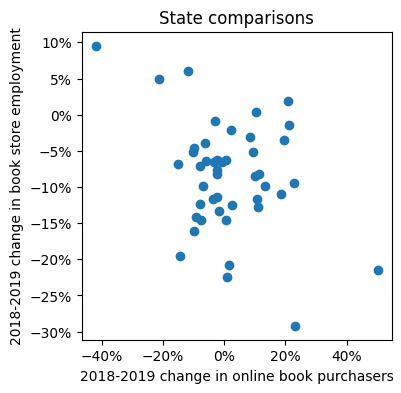

In [56]:
import matplotlib.ticker as mtick

fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.scatter(
    100*book_buyers_pct_changes['2018-2019 pct change'].loc[sample_states], 
    100*census_books_stores['2018-2019 employment/population percent change'].loc[sample_states]
)
ax.set_title('State comparisons')
ax.xaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
ax.set_xlabel('2018-2019 change in online book purchasers')
_ = ax.set_ylabel('2018-2019 change in book store employment')

Text(0, 0.5, '2019-2020 change in book store employment')

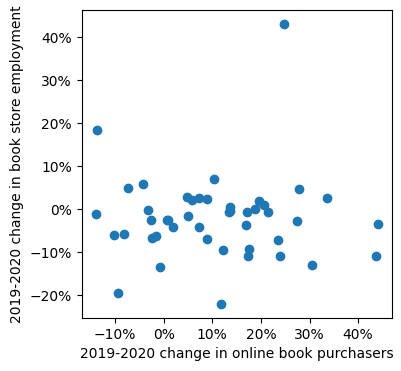

In [57]:
import matplotlib.ticker as mtick

fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.scatter(
    100*book_buyers_pct_changes['2019-2020 pct change'].loc[sample_states], 
    100*census_books_stores['2019-2020 employment/population percent change'].loc[sample_states]
)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
ax.set_xlabel('2019-2020 change in online book purchasers')
ax.set_ylabel('2019-2020 change in book store employment')

#### Check with robust 2018-2019 data


In [53]:
book_buyers_pct_changes_r20182019 = get_pct_change_buyers_via_random_sampling(book_purchases_robust20182019, 2018, 2019)

2018-2019: 1/1000
8806 purchases from N=1340 purchasers in 2018 dataset
8041 purchases from N=1300 purchasers in 2019 dataset
2018-2019: 501/1000
8967 purchases from N=1322 purchasers in 2018 dataset
8353 purchases from N=1336 purchasers in 2019 dataset


In [54]:
print('Comparing to 2018-2019 census data: Employment')
r, pvalue = pearsonr(
    book_buyers_pct_changes_r20182019.loc[sample_states], 
    census_books_stores['2018-2019 employment/population percent change'].loc[sample_states]
)
print('Pearson r=%0.4f (p-value=%0.4f)' % (r, pvalue))

Comparing to 2018-2019 census data: Employment
Pearson r=-0.3903 (p-value=0.0080)


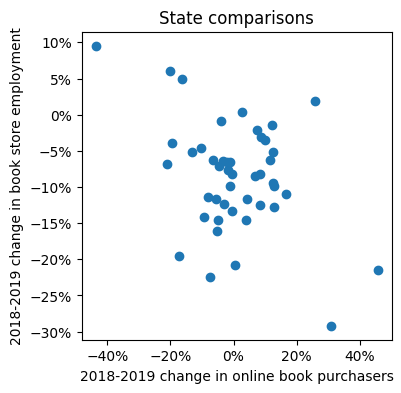

In [55]:
import matplotlib.ticker as mtick

fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.scatter(
    100*book_buyers_pct_changes_r20182019.loc[sample_states], 
    100*census_books_stores['2018-2019 employment/population percent change'].loc[sample_states]
)
ax.set_title('State comparisons')
ax.xaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
ax.set_xlabel('2018-2019 change in online book purchasers')
_ = ax.set_ylabel('2018-2019 change in book store employment')

We find the expected negative correlation (p<0.05) comparing:
- 2018-2019 change in number of book buyers per state
- 2018-2019 change in employment per state

Correlation stronger when limiting to partipants who had consistent primary shipping address states 2018-2019

(change found for random sample without stratifying, N=2500)

Not found for:
- total number of purchases per state
- employment in following year (2019-2020 has opposite direction)
- number establishments


Questions:

How does this change by sampling strategy?
- random sample vs stratified random sample 
- smaller N for simple random sample
    - N=2000 --> weaker correlation
    
Notes: 
- Correlation is about the same (slightly weaker) when using portion increases by purchaser
- normalizing employment by population works slightly better than not normalizing by population
- correlation weaker when limiting to enterprises <500 employees or <20 employees

In [56]:
# Look at the data
books_metrics = pd.DataFrame({
    'book buyers pct changes': book_buyers_pct_changes['2018-2019 pct change'],
    'book purchases pct changes': book_purchases_pct_change,
    'book portion increases by purchaser': book_portion_increases_by_purchaser
})
print('Correlations between metrics (2018-2019):')
display(books_metrics.corr())
books_metrics.head()

Correlations between metrics (2018-2019):


,book buyers pct changes,book purchases pct changes,book portion increases by purchaser
book buyers pct changes,1.000000,0.356328,0.703202
book purchases pct changes,0.356328,1.000000,0.611868
book portion increases by purchaser,0.703202,0.611868,1.000000


,book buyers pct changes,book purchases pct changes,book portion increases by purchaser
Shipping Address State,,,
AL,0.008494,0.147436,0.519231
AR,-0.039110,0.351648,0.571429
AZ,0.003349,0.424710,0.432836
CA,-0.094119,-0.024564,0.416894
CO,0.198282,-0.284375,0.465116


#### Compare changes in purchases and number of establishments

Compare: percent change in purchases to percent change in number of establishments

For
- 2018 - 2021
- 2019 - 2021 (COVID effects isolated)

In [149]:
pct_changes = get_pct_change_buyers_via_random_sampling(book_purchases, 2018, 2021)
book_buyers_pct_changes['2018-2021 pct change'] = book_buyers_pct_changes.index.map(pct_changes)
pct_changes = get_pct_change_buyers_via_random_sampling(book_purchases, 2019, 2021)
book_buyers_pct_changes['2019-2021 pct change'] = book_buyers_pct_changes.index.map(pct_changes)

2018-2021: 1/1000
8917 purchases from N=1338 purchasers in 2018 dataset
9694 purchases from N=1380 purchasers in 2021 dataset
2018-2021: 501/1000
8493 purchases from N=1303 purchasers in 2018 dataset
9216 purchases from N=1380 purchasers in 2021 dataset
2019-2021: 1/1000
7852 purchases from N=1319 purchasers in 2019 dataset
9437 purchases from N=1414 purchasers in 2021 dataset
2019-2021: 501/1000
7972 purchases from N=1336 purchasers in 2019 dataset
9262 purchases from N=1432 purchasers in 2021 dataset


In [151]:
print('Comparing 2018-2021 changes in purchases to changes in census data: establishments')
r, pvalue = pearsonr(
    book_buyers_pct_changes['2018-2021 pct change'].loc[sample_states], 
    census_books_stores['2018-2021 establishments percent change'].loc[sample_states]
)
print('Pearson r=%0.4f (p-value=%0.4f)' % (r, pvalue))

Comparing 2018-2021 changes in purchases to changes in census data: establishments
Pearson r=-0.2029 (p-value=0.1812)


In [152]:
print('Comparing 2019-2021 changes in purchases to changes in census data: establishments')
r, pvalue = pearsonr(
    book_buyers_pct_changes['2019-2021 pct change'].loc[sample_states], 
    census_books_stores['2019-2021 establishments percent change'].loc[sample_states]
)
print('Pearson r=%0.4f (p-value=%0.4f)' % (r, pvalue))

Comparing 2019-2021 changes in purchases to changes in census data: establishments
Pearson r=-0.1704 (p-value=0.2630)


## Shoes

https://www.naics.com/naics-code-description/?code=448210

Look at them

In [58]:
shoesy_categories = [c for c in categories if 'shoe' in str(c).lower()]
amzn_data[amzn_data[CATEGORY].isin(shoesy_categories)][CATEGORY].value_counts()

Category
SHOES                   12758
SHOE_INSERT              1804
SHOELACE                  892
SHOE_ACCESSORY            248
SHOE_TREE                 148
TECHNICAL_SPORT_SHOE      123
SHOE_BAG                   37
SNOWSHOE                   27
SHOE_POLISH                18
GUILD_SHOES                 1
Name: count, dtype: int64

FYI the 'Guild shoes' are beautifully crafted crochet sneakers made by an artist. Not to be included in shoes analysis. https://www.amazon.com/Sneakers-Slippers-Crochet-Comfortable-Basketball/dp/B09X5RGJKG

In [59]:
inspect_category('TECHNICAL_SPORT_SHOE')
view_category_top_purchases('TECHNICAL_SPORT_SHOE')

,Category,Title,Purchase Price Per Unit,Quantity,Shipping Address State
48994,TECHNICAL_SPORT_SHOE,JOINFREE Womens Durable Work Shoes Anti-Skid W...,25.99,1.0,IN
50437,TECHNICAL_SPORT_SHOE,New Balance Women's Fresh Foam 1165 V1 Walking...,21.54,1.0,FL
51438,TECHNICAL_SPORT_SHOE,New Balance Men's FuelCell Echo V1 Running Shoe,61.75,1.0,KY
59956,TECHNICAL_SPORT_SHOE,adidas Men's Lite Racer Adapt 4.0 Running Shoe,47.97,1.0,CA
113188,TECHNICAL_SPORT_SHOE,adidas Women's Qt Racer 2.0 Running Shoe,41.99,1.0,CA


Viewing top purchases for category: TECHNICAL_SPORT_SHOE


,count
Title,
New Balance Men's 608 V5 Casual Comfort Cross Trainer,7
adidas Women's Puremotion-Adapt Running Shoe,4
New Balance Men's 410 V5 Cushioning Trail Running Shoe,3
Bigib Toddler Kids Swim Water Shoes Quick Dry Non-Slip Water Skin Barefoot Sports Shoes Aqua Socks for Boys Girls Toddler,3
New Balance Men's 510 V4 Trail Running Shoe,3


Are there other shoesy categories?

In [60]:
slippers_categories = [c for c in categories if 'slipper' in str(c).lower()]
print(amzn_data[amzn_data['Category'].isin(slippers_categories)]['Category'].value_counts())

sandals_categories = [c for c in categories if 'sandal' in str(c).lower()]
print(amzn_data[amzn_data['Category'].isin(sandals_categories)]['Category'].value_counts())

boot_categories = [c for c in categories if 'boot' in str(c).lower()]
print(amzn_data[amzn_data['Category'].isin(boot_categories)]['Category'].value_counts())

Category
SLIPPER    2711
Name: count, dtype: int64
Category
SANDAL    3641
Name: count, dtype: int64
Category
BOOT              3167
SNOWBOARD_BOOT       7
Name: count, dtype: int64


In [61]:
view_category_top_purchases('SLIPPER')

Viewing top purchases for category: SLIPPER


,count
Title,
RockDove Men's Original Two-Tone Memory Foam Slipper,67
"ULTRAIDEAS Women's Fuzzy Wool-Like House Shoes with Memory Foam, Gift for Women, Ladies Slippers with Indoor &Outdoor Anti-Skid Rubber Sole",51
Jessica Simpson Women's Comfy Faux Fur House Slipper Scuff Memory Foam Slip on Anti-Skid Sole,23
Dearfoams Women's Rebecca Lightweight Cozy Memory Foam Closed Back Slipper with Wide Widths,22
landeer Women's and Men's Memory Foam Slippers Casual House Shoes,18


In [62]:
view_category_top_purchases('BOOT')

Viewing top purchases for category: BOOT


,count
Title,
Lone Cone Rain Boots with Easy-On Handles in Fun Patterns for Toddlers and Kids,34
Hudson Baby Unisex-Baby Cozy Fleece Booties,30
Asgard Women's Ankle Rain Boots Waterproof Chelsea Boots,24
Clarks Men's Bushacre 2 Chukka Boot,21
Columbia Men's Newton Ridge Plus Ii Waterproof Hiking Boot Shoe,18


In [63]:
shoe_categories = ['SHOES', 'TECHNICAL_SPORT_SHOE', 'BOOT', 'SANDAL', 'SLIPPER']
shoe_purchases = amzn_data_sample[amzn_data_sample['Category'].isin(shoe_categories)]
shoe_purchases_robust20182019 = shoe_purchases[shoe_purchases[RESPONSE_ID].isin(robust_rids_20182019)]

print('%s total shoe purchases in dataset' % len(shoe_purchases))

20482 total shoe purchases in dataset


### Shoe purchases analysis


Data checks

In [64]:
# Sum is sum over quanity. Count is unique purchases per person per year
print('There are some outlier purchasers making lots of purchases!')
print('Shoe purchases per person per year')
shoe_purchases_per_person = shoe_purchases.groupby([YEAR,RESPONSE_ID])['Quantity'].agg(['sum','count'])
shoe_purchases_per_person.describe()

There are some outlier purchasers making lots of purchases!
Shoe purchases per person per year


,sum,count
count,7782.000000,7782.000000
mean,2.648419,2.631971
std,3.356282,3.338619
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,83.000000,83.000000


In [65]:
# What is the 90th percentile?
# Actually the 99th percentile is a reasonable amount of shoes to buy (imagine they have a family)
print('90th percentile : ', shoe_purchases_per_person['sum'].quantile(0.90))
print('95th percentile : ', shoe_purchases_per_person['sum'].quantile(0.95))
print('99th percentile : ', shoe_purchases_per_person['sum'].quantile(0.99))

90th percentile :  5.0
95th percentile :  8.0
99th percentile :  15.0


In [66]:
shoe_purchases_pct_change20182019 = get_pct_change_purchases(shoe_purchases, verbose=True)
shoe_purchases_pct_change20182019.head()

2746 purchases from N=1178 purchasers in 2018 dataset
3500 purchases from N=1388 purchasers in 2019 dataset


Shipping Address State
AL    0.096774
AR   -0.212121
AZ    0.447368
CA    0.178808
CO   -0.136364
Name: Quantity, dtype: float64

In [67]:
shoe_buyers_pct_change20182019 = get_pct_change_buyers(shoe_purchases, verbose=True)
shoe_buyers_pct_change20182019.head()

2746 purchases from N=1178 purchasers in 2018 dataset
3500 purchases from N=1388 purchasers in 2019 dataset


Shipping Address State
AL    0.062500
AR    0.300000
AZ    0.578947
CA    0.222222
CO    0.380952
Name: Survey ResponseID, dtype: float64

In [68]:
print('correlation between percent change in buyers vs total purchases (shoes)')
r, pvalue = pearsonr(shoe_purchases_pct_change20182019, shoe_buyers_pct_change20182019)
print('Pearson r=%0.4f (p-value=%0.4f)' % (r, pvalue))
r, pvalue = spearmanr(shoe_purchases_pct_change20182019, shoe_buyers_pct_change20182019)
print('Spearman r=%0.4f (p-value=%0.4f)' % (r, pvalue))

correlation between percent change in buyers vs total purchases (shoes)
Pearson r=0.8501 (p-value=0.0000)
Spearman r=0.6214 (p-value=0.0000)


#### Compare census data to purchases data

Using random sampling


In [69]:
pct_changes = get_pct_change_buyers_via_random_sampling(shoe_purchases, 2018, 2019)
shoe_buyers_pct_changes = pct_changes.rename('2018-2019 pct change').to_frame()
pct_changes = get_pct_change_buyers_via_random_sampling(shoe_purchases, 2019, 2020)
shoe_buyers_pct_changes['2019-2020 pct change'] = shoe_buyers_pct_changes.index.map(pct_changes)
pct_changes = get_pct_change_buyers_via_random_sampling(shoe_purchases, 2020, 2021)
shoe_buyers_pct_changes['2020-2021 pct change'] = shoe_buyers_pct_changes.index.map(pct_changes)
shoe_buyers_pct_changes.head()

2018-2019: 1/1000
2027 purchases from N=865 purchasers in 2018 dataset
2663 purchases from N=1020 purchasers in 2019 dataset
2018-2019: 501/1000
1980 purchases from N=867 purchasers in 2018 dataset
2522 purchases from N=1032 purchasers in 2019 dataset
2019-2020: 1/1000
2477 purchases from N=963 purchasers in 2019 dataset
2737 purchases from N=1080 purchasers in 2020 dataset
2019-2020: 501/1000
2551 purchases from N=980 purchasers in 2019 dataset
2701 purchases from N=1067 purchasers in 2020 dataset
2020-2021: 1/1000
2421 purchases from N=1003 purchasers in 2020 dataset
3105 purchases from N=1138 purchasers in 2021 dataset
2020-2021: 501/1000
2617 purchases from N=1038 purchasers in 2020 dataset
3171 purchases from N=1149 purchasers in 2021 dataset


,2018-2019 pct change,2019-2020 pct change,2020-2021 pct change
Shipping Address State,,,
AL,0.078612,0.020043,0.558751
AR,0.342762,0.087643,-0.053131
AZ,0.603896,0.072308,-0.066221
CA,0.222621,-0.096807,0.139166
CO,0.397106,0.107226,-0.063314


In [70]:
print('Comparing to 2018-2019 census data: Employment')
r, pvalue = pearsonr(
    shoe_buyers_pct_changes['2018-2019 pct change'].loc[sample_states], 
    census_shoe_stores['2018-2019 employment/population percent change'].loc[sample_states]
)
print('Pearson r=%0.4f (p-value=%0.4f)' % (r, pvalue))

Comparing to 2018-2019 census data: Employment
Pearson r=-0.3149 (p-value=0.0351)


In [71]:
print('Comparing to 2019-2020 census data: Employment')
r, pvalue = pearsonr(
    shoe_buyers_pct_changes['2019-2020 pct change'].loc[sample_states], 
    census_shoe_stores['2019-2020 employment/population percent change'].loc[sample_states]
)
print('Pearson r=%0.4f (p-value=%0.4f)' % (r, pvalue))

Comparing to 2019-2020 census data: Employment
Pearson r=-0.0016 (p-value=0.9917)


In [72]:
print('Comparing to 2020-2021 census data: Employment')
r, pvalue = pearsonr(
    shoe_buyers_pct_changes['2020-2021 pct change'].loc[sample_states], 
    census_shoe_stores['2020-2021 employment/population percent change'].loc[sample_states]
)
print('Pearson r=%0.4f (p-value=%0.4f)' % (r, pvalue))

Comparing to 2020-2021 census data: Employment
Pearson r=-0.1514 (p-value=0.3209)


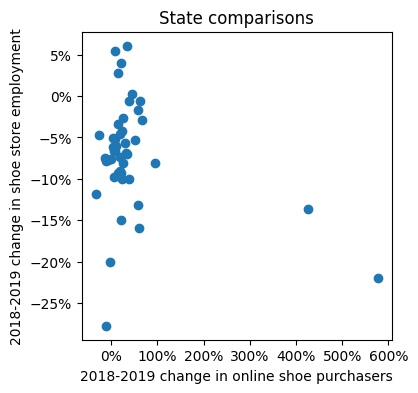

In [73]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.scatter(
    100*shoe_buyers_pct_changes['2018-2019 pct change'].loc[sample_states], 
    100*census_shoe_stores['2018-2019 employment/population percent change'].loc[sample_states]
)
ax.set_title('State comparisons')
# ax.set_xlim(-10,110)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
ax.set_xlabel('2018-2019 change in online shoe purchasers')
_ = ax.set_ylabel('2018-2019 change in shoe store employment')

### Robust check

Repeat the analysis for 2018-2019 using the robust sample


In [73]:
shoe_buyers_pct_changes_r20182019 = get_pct_change_buyers_via_random_sampling(shoe_purchases_robust20182019, 2018, 2019)

2018-2019: 1/1000
1934 purchases from N=822 purchasers in 2018 dataset
2511 purchases from N=1000 purchasers in 2019 dataset
2018-2019: 501/1000
1974 purchases from N=847 purchasers in 2018 dataset
2403 purchases from N=979 purchasers in 2019 dataset


In [74]:
print('Comparing to 2018-2019 census data: Employment')
r, pvalue = pearsonr(
    shoe_buyers_pct_changes_r20182019.loc[sample_states], 
    census_shoe_stores['2018-2019 employment/population percent change'].loc[sample_states]
)
print('Pearson r=%0.4f (p-value=%0.4f)' % (r, pvalue))

Comparing to 2018-2019 census data: Employment
Pearson r=-0.2986 (p-value=0.0463)


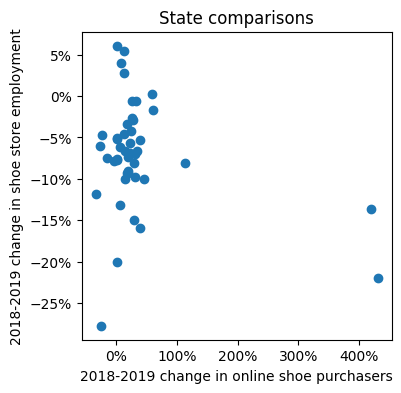

In [75]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.scatter(
    100*shoe_buyers_pct_changes_r20182019.loc[sample_states],
    100*census_shoe_stores['2018-2019 employment/population percent change'].loc[sample_states]
)
ax.set_title('State comparisons')
# ax.set_xlim(-10,110)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
ax.set_xlabel('2018-2019 change in online shoe purchasers')
_ = ax.set_ylabel('2018-2019 change in shoe store employment')

Notes from experiments

- using a smaller random sample (given fewer ppl buy shoes than books) reduces correlation
- No significant correlation with # Establishments
- Stratifying by state: No improvement
- Slightly stronger negative correlation when comparing total purchases to employment
- Doesn't work: comparing portion of purchasers increasing purchases
- Doesn't work/correlation too weak: Limiting to establishments of smaller size

- normalizing employment by population works slightly better than not normalizing by population


#### Compare changes in purchases and number of establishments

Compare: percent change in purchases to percent change in number of establishments

For
- 2018 - 2021
- 2019 - 2021 (COVID effects isolated)

In [153]:
pct_changes = get_pct_change_buyers_via_random_sampling(shoe_purchases, 2018, 2021)
shoe_buyers_pct_changes['2018-2021 pct change'] = shoe_buyers_pct_changes.index.map(pct_changes)
pct_changes = get_pct_change_buyers_via_random_sampling(shoe_purchases, 2019, 2021)
shoe_buyers_pct_changes['2019-2021 pct change'] = shoe_buyers_pct_changes.index.map(pct_changes)

2018-2021: 1/1000
1890 purchases from N=826 purchasers in 2018 dataset
3146 purchases from N=1168 purchasers in 2021 dataset
2018-2021: 501/1000
1868 purchases from N=813 purchasers in 2018 dataset
3353 purchases from N=1166 purchasers in 2021 dataset
2019-2021: 1/1000
2292 purchases from N=942 purchasers in 2019 dataset
3154 purchases from N=1147 purchasers in 2021 dataset
2019-2021: 501/1000
2332 purchases from N=929 purchasers in 2019 dataset
3232 purchases from N=1157 purchasers in 2021 dataset


In [155]:
print('Comparing 2018-2021 changes in purchases to changes in census data: establishments')
r, pvalue = pearsonr(
    shoe_buyers_pct_changes['2018-2021 pct change'].loc[sample_states], 
    census_shoe_stores['2018-2021 establishments percent change'].loc[sample_states]
)
print('Pearson r=%0.4f (p-value=%0.4f)' % (r, pvalue))

Comparing 2018-2021 changes in purchases to changes in census data: establishments
Pearson r=-0.0584 (p-value=0.7031)


In [157]:
print('Comparing 2019-2021 changes in purchases to changes in census data: establishments')
r, pvalue = pearsonr(
    shoe_buyers_pct_changes['2019-2021 pct change'].loc[sample_states], 
    census_shoe_stores['2019-2021 establishments percent change'].loc[sample_states]
)
print('Pearson r=%0.4f (p-value=%0.4f)' % (r, pvalue))

Comparing 2019-2021 changes in purchases to changes in census data: establishments
Pearson r=0.3760 (p-value=0.0109)


### Pharmacies and drug stores

https://www.census.gov/naics/?input=drug+stores&year=2022&details=456110

In [51]:
# Use the same pharmacy categories as other analyses
pharmacy_cats = [
    'HEALTH_PERSONAL_CARE',
    'MEDICATION',
    'VITAMIN',
    'HERBAL_SUPPLEMENT',
    'SKIN_MOISTURIZER',
    'SKIN_CLEANING_AGENT',
    'BEAUTY',
]

print('%s pharmacy categories' % len(pharmacy_cats))
# print(pharmacy_cats)
pharm_purchases = amzn_data_sample[amzn_data_sample['Category'].isin(pharmacy_cats)]
print('%s total pharmacy related purchases in sample' % len(pharm_purchases))
pharm_purchases[CATEGORY].value_counts()

7 pharmacy categories
79959 total pharmacy related purchases in sample


Category
HEALTH_PERSONAL_CARE    15292
MEDICATION              15195
SKIN_MOISTURIZER        12514
SKIN_CLEANING_AGENT     10494
VITAMIN                 10196
HERBAL_SUPPLEMENT        8192
BEAUTY                   8076
Name: count, dtype: int64

In [53]:
# Sum is sum over quanity. Count is unique purchases per person per year
print('Pharmacy purchases per person per year')
pharm_purchases_per_person = pharm_purchases.groupby([YEAR,RESPONSE_ID])['Quantity'].agg(['sum','count'])
pharm_purchases_per_person.describe()

Pharmacy purchases per person per year


,sum,count
count,13158.000000,13158.000000
mean,6.619851,6.076835
std,10.027781,8.438076
min,1.000000,1.000000
25%,1.000000,1.000000
50%,3.000000,3.000000
75%,8.000000,7.000000
max,334.000000,165.000000


#### Compare census data to purchases data

Using random sampling


In [54]:
print('Pharmacy purchases')
pct_changes = get_pct_change_buyers_via_random_sampling(pharm_purchases, 2018, 2019)
pharm_buyers_pct_changes = pct_changes.rename('2018-2019 pct change').to_frame()
pharm_buyers_pct_changes.head()

Pharmacy purchases
2018-2019: 1/1000
5823 purchases from N=1238 purchasers in 2018 dataset
7071 purchases from N=1364 purchasers in 2019 dataset
2018-2019: 501/1000
5710 purchases from N=1226 purchasers in 2018 dataset
6942 purchases from N=1352 purchasers in 2019 dataset


,2018-2019 pct change
Shipping Address State,
AL,-0.117021
AR,0.536284
AZ,0.235348
CA,0.118573
CO,0.072159


In [56]:
print('Comparing pharmacy purchases to 2018-2019 census data: Employment')
r, pvalue = pearsonr(
    pharm_buyers_pct_changes['2018-2019 pct change'].loc[sample_states], 
    census_pharmacies['2018-2019 employment/population percent change'].loc[sample_states]
)
print('Pearson r=%0.4f (p-value=%0.4f)' % (r, pvalue))

Comparing pharmacy purchases to 2018-2019 census data: Employment
Pearson r=0.2187 (p-value=0.1489)


#### Compare changes in purchases and number of establishments

Compare: percent change in purchases to percent change in number of establishments

For
- 2018 - 2021
- 2019 - 2021 (COVID effects isolated)

In [57]:
pharm_buyers_pct_changes20182021 = get_pct_change_buyers_via_random_sampling(pharm_purchases, 2018, 2021).dropna()
pharm_buyers_pct_changes20192021 = get_pct_change_buyers_via_random_sampling(pharm_purchases, 2019, 2021).dropna()

2018-2021: 1/1000
4694 purchases from N=1066 purchasers in 2018 dataset
10289 purchases from N=1526 purchasers in 2021 dataset
2018-2021: 501/1000
4981 purchases from N=1084 purchasers in 2018 dataset
10396 purchases from N=1523 purchasers in 2021 dataset
2019-2021: 1/1000
6282 purchases from N=1216 purchasers in 2019 dataset
10810 purchases from N=1530 purchasers in 2021 dataset
2019-2021: 501/1000
5731 purchases from N=1199 purchasers in 2019 dataset
10292 purchases from N=1546 purchasers in 2021 dataset


In [69]:
print('Comparing 2018-2021 changes in purchases to changes in census data: establishments')
r, pvalue = pearsonr(
    pharm_buyers_pct_changes20182021, 
    census_pharmacies['2018-2021 establishments percent change'].loc[pharm_buyers_pct_changes20182021.index]
)
print('Pearson r=%0.4f (p-value=%0.4f)' % (r, pvalue))

Comparing 2018-2021 changes in purchases to changes in census data: establishments
Pearson r=-0.0394 (p-value=0.7970)


In [70]:
print('Comparing 2019-2021 changes in purchases to changes in census data: establishments')
r, pvalue = pearsonr(
    pharm_buyers_pct_changes20192021, 
    census_pharmacies['2019-2021 establishments percent change'].loc[pharm_buyers_pct_changes20192021.index]
)
print('Pearson r=%0.4f (p-value=%0.4f)' % (r, pvalue))

Comparing 2019-2021 changes in purchases to changes in census data: establishments
Pearson r=0.0365 (p-value=0.8120)


### Supermarkets and grocery stores

https://www.census.gov/naics/?input=grocery&year=2022&details=445110

In [58]:
# Use the same grocery categories as other analyses
groc_categories = ['GROCERY', 'FOOD', 'VEGETABLE', 'FRUIT', 'DAIRY_BASED_CHEESE', 'BREAD', 'POULTRY', 'DRINK_FLAVORED', 'SNACK_CHIP_AND_CRISP', 'HERB', 'MEAT', 'FRUIT_SNACK', 'SAUCE', 'NUT_AND_SEED', 'SNACK_MIX', 'WATER', 'DAIRY_BASED_CREAM', 'NOODLE', 'PUFFED_SNACK', 'PACKAGED_SOUP_AND_STEW', 'MILK_SUBSTITUTE', 'CRACKER', 'COOKIE', 'SUGAR_CANDY', 'SYRUP', 'DAIRY_BASED_BUTTER', 'BREAKFAST_CEREAL', 'COFFEE', 'TEA', 'SNACK_FOOD_BAR', 'POPCORN', 'LEAVENING_AGENT', 'Grocery', 'DAIRY_BASED_YOGURT', 'CHOCOLATE_CANDY', 'EDIBLE_OIL_VEGETABLE', 'JUICE_AND_JUICE_DRINK', 'SEASONING', 'CAKE', 'DAIRY_BASED_ICE_CREAM', 'DAIRY_BASED_DRINK', 'CONDIMENT', 'LEGUME', 'RICE_MIX', 'CHEWING_GUM', 'FISH', 'CULINARY_SALT', 'SUGAR', 'NUTRITIONAL_SUPPLEMENT', 'NUT_BUTTER', 'PASTRY', 'THICKENING_AGENT', 'CEREAL', 'BAKING_MIX', 'SALAD_DRESSING', 'HERBAL_SUPPLEMENT']
print('%s grocery categories' % len(groc_categories))
# print(groc_categories)
groc_purchases = amzn_data_sample[amzn_data_sample['Category'].isin(groc_categories)]
print('%s total grocery purchases in sample' % len(groc_purchases))
groc_purchases[CATEGORY].value_counts()

56 grocery categories
210371 total grocery purchases in sample


Category
NUTRITIONAL_SUPPLEMENT    24995
FOOD                      10795
GROCERY                   10753
VEGETABLE                 10463
COFFEE                    10080
DRINK_FLAVORED             8732
HERBAL_SUPPLEMENT          8192
FRUIT                      7372
SNACK_FOOD_BAR             6955
TEA                        6012
SUGAR_CANDY                5397
SNACK_CHIP_AND_CRISP       5232
DAIRY_BASED_CHEESE         4744
SAUCE                      4603
COOKIE                     4486
NUT_AND_SEED               4401
BREAKFAST_CEREAL           4349
MEAT                       4330
WATER                      4307
BREAD                      3754
PACKAGED_SOUP_AND_STEW     3579
CHOCOLATE_CANDY            3565
HERB                       3470
NOODLE                     3346
POULTRY                    3219
FRUIT_SNACK                2894
JUICE_AND_JUICE_DRINK      2877
CRACKER                    2677
LEGUME                     2046
EDIBLE_OIL_VEGETABLE       1954
DAIRY_BASED_DRINK          1883

In [59]:
fresh_groc_cats = [
    'VEGETABLE', 'FRUIT', 'DAIRY_BASED_CHEESE', 'POULTRY', 'FISH',
]
print('%s *fresh* grocery categories' % len(fresh_groc_cats))
# print(groc_categories)
fresh_groc_purchases = amzn_data_sample[amzn_data_sample['Category'].isin(fresh_groc_cats)]
print('%s total grocery purchases in sample by %s users' % (len(fresh_groc_purchases), fresh_groc_purchases[RESPONSE_ID].nunique()))
fresh_groc_purchases[CATEGORY].value_counts()

5 *fresh* grocery categories
27500 total grocery purchases in sample by 1100 users


Category
VEGETABLE             10463
FRUIT                  7372
DAIRY_BASED_CHEESE     4744
POULTRY                3219
FISH                   1702
Name: count, dtype: int64

Data checks

In [60]:
# Sum is sum over quanity. Count is unique purchases per person per year
print('There is huge variation in the number of per person purchases per year')
print('Grocery purchases per person per year')
groc_purchases_per_person = groc_purchases.groupby([YEAR,RESPONSE_ID])['Quantity'].agg(['sum','count'])
groc_purchases_per_person.describe()

There is huge variation in the number of per person purchases per year
Grocery purchases per person per year


,sum,count
count,13373.000000,13373.000000
mean,19.157108,15.731025
std,54.620761,41.827044
min,1.000000,1.000000
25%,2.000000,2.000000
50%,5.000000,5.000000
75%,14.000000,13.000000
max,1326.000000,997.000000


In [61]:
# Sum is sum over quanity. Count is unique purchases per person per year
print('There is huge variation in the number of per person purchases per year')
print('Fresh grocery purchases per person per year')
fresh_groc_purchases_per_person = fresh_groc_purchases.groupby([YEAR,RESPONSE_ID])['Quantity'].agg(['sum','count'])
fresh_groc_purchases_per_person.describe()

There is huge variation in the number of per person purchases per year
Fresh grocery purchases per person per year


,sum,count
count,1998.000000,1998.000000
mean,17.467467,13.763764
std,40.061654,31.272195
min,1.000000,1.000000
25%,1.000000,1.000000
50%,3.000000,3.000000
75%,14.000000,11.000000
max,546.000000,478.000000


#### Compare census data to purchases data

Using random sampling


In [62]:
print('Grocery purchases')
pct_changes = get_pct_change_buyers_via_random_sampling(groc_purchases, 2018, 2019)
groc_buyers_pct_changes = pct_changes.rename('2018-2019 pct change').to_frame()
groc_buyers_pct_changes.head()

Grocery purchases
2018-2019: 1/1000
9958 purchases from N=1204 purchasers in 2018 dataset
13854 purchases from N=1343 purchasers in 2019 dataset
2018-2019: 501/1000
9391 purchases from N=1189 purchasers in 2018 dataset
13407 purchases from N=1359 purchasers in 2019 dataset


,2018-2019 pct change
Shipping Address State,
AL,0.058839
AR,0.471951
AZ,0.470215
CA,0.146040
CO,0.130662


In [63]:
print('Fresh grocery purchases')
pct_changes = get_pct_change_buyers_via_random_sampling(fresh_groc_purchases, 2018, 2019)
fresh_groc_buyers_pct_changes = pct_changes.rename('2018-2019 pct change').to_frame().dropna()
fresh_groc_buyers_pct_changes.head()

Fresh grocery purchases
2018-2019: 1/1000
446 purchases from N=153 purchasers in 2018 dataset
1432 purchases from N=212 purchasers in 2019 dataset
2018-2019: 501/1000
446 purchases from N=153 purchasers in 2018 dataset
1432 purchases from N=212 purchasers in 2019 dataset


,2018-2019 pct change
Shipping Address State,
AL,1.000000
AR,0.997000
AZ,1.000000
CA,0.923712
CO,-0.249833


In [64]:
print('Comparing grocery purchases to 2018-2019 census data: Employment')
r, pvalue = pearsonr(
    groc_buyers_pct_changes['2018-2019 pct change'].loc[sample_states], 
    census_grocery_stores['2018-2019 employment/population percent change'].loc[sample_states]
)
print('Pearson r=%0.4f (p-value=%0.4f)' % (r, pvalue))

Comparing grocery purchases to 2018-2019 census data: Employment
Pearson r=-0.1422 (p-value=0.3516)


In [65]:
print('Comparing *fresh* grocery purchases to 2018-2019 census data: Employment')
r, pvalue = pearsonr(
    fresh_groc_buyers_pct_changes['2018-2019 pct change'], 
    census_grocery_stores['2018-2019 employment/population percent change'].loc[fresh_groc_buyers_pct_changes.index]
)
print('Pearson r=%0.4f (p-value=%0.4f)' % (r, pvalue))

Comparing *fresh* grocery purchases to 2018-2019 census data: Employment
Pearson r=-0.2654 (p-value=0.1177)


#### Compare changes in purchases and number of establishments

Compare: percent change in purchases to percent change in number of establishments

For
- 2018 - 2021
- 2019 - 2021 (COVID effects isolated)

In [66]:
fresh_groc_buyers_pct_changes20182021 = get_pct_change_buyers_via_random_sampling(fresh_groc_purchases, 2018, 2021).dropna()
fresh_groc_buyers_pct_changes20192021 = get_pct_change_buyers_via_random_sampling(fresh_groc_purchases, 2019, 2021).dropna()

2018-2021: 1/1000
437 purchases from N=149 purchasers in 2018 dataset
8942 purchases from N=498 purchasers in 2021 dataset
2018-2021: 501/1000
442 purchases from N=150 purchasers in 2018 dataset
8939 purchases from N=499 purchasers in 2021 dataset
2019-2021: 1/1000
1409 purchases from N=207 purchasers in 2019 dataset
8583 purchases from N=496 purchasers in 2021 dataset
2019-2021: 501/1000
1414 purchases from N=209 purchasers in 2019 dataset
8765 purchases from N=499 purchasers in 2021 dataset


In [67]:
print('Comparing 2018-2021 changes in purchases to changes in census data: establishments')
r, pvalue = pearsonr(
    fresh_groc_buyers_pct_changes20182021, 
    census_grocery_stores['2018-2021 establishments percent change'].loc[fresh_groc_buyers_pct_changes20182021.index]
)
print('Pearson r=%0.4f (p-value=%0.4f)' % (r, pvalue))

Comparing 2018-2021 changes in purchases to changes in census data: establishments
Pearson r=0.0689 (p-value=0.6898)


In [68]:
print('Comparing 2019-2021 changes in purchases to changes in census data: establishments')
r, pvalue = pearsonr(
    fresh_groc_buyers_pct_changes20192021, 
    census_grocery_stores['2019-2021 establishments percent change'].loc[fresh_groc_buyers_pct_changes20192021.index]
)
print('Pearson r=%0.4f (p-value=%0.4f)' % (r, pvalue))

Comparing 2019-2021 changes in purchases to changes in census data: establishments
Pearson r=-0.1218 (p-value=0.4603)


## Pet food, pet supplies, etc

Census data shows overall increases in employment year to year.

In [76]:
pet_categories = [c for c in categories if str(c).startswith('PET_')]
print('%s pet related categories' % len(pet_categories))
amzn_data[amzn_data[CATEGORY].isin(pet_categories)][CATEGORY].value_counts()

14 pet related categories


Category
PET_FOOD                  38256
PET_SUPPLIES              10902
PET_TOY                    7261
PET_PEST_CONTROL           1941
PET_FEEDER                 1870
PET_ACTIVITY_STRUCTURE     1712
PET_BED_MAT                1665
PET_APPAREL                1444
PET_PLACEMAT                436
PET_HEALTH_CARE             300
PET_PLAYPEN                 261
PET_DOOR                    209
PET_SEAT                     52
PET_FUR_DEODORIZER           11
Name: count, dtype: int64

In [77]:
pet_purchases = amzn_data_sample[amzn_data_sample[CATEGORY].isin(pet_categories)]
print('%s total pet purchases in dataset' % len(pet_purchases))

61629 total pet purchases in dataset


In [78]:
# Sum is sum over quanity. Count is unique purchases per person per year
print('Pet purchases per person per year')
pet_purchases_per_person = pet_purchases.groupby([YEAR,RESPONSE_ID])['Quantity'].agg(['sum','count'])
pet_purchases_per_person.describe()

Pet purchases per person per year


,sum,count
count,8302.000000,8302.000000
mean,8.471332,7.423392
std,15.137035,12.050334
min,1.000000,1.000000
25%,1.000000,1.000000
50%,3.000000,3.000000
75%,9.000000,8.000000
max,257.000000,164.000000


In [79]:
# What is the 90th percentile?
# Actually the 99th percentile is a reasonable amount of shoes to buy (imagine they have a family)
print('90th percentile : ', pet_purchases_per_person['sum'].quantile(0.90))
print('95th percentile : ', pet_purchases_per_person['sum'].quantile(0.95))
print('99th percentile : ', pet_purchases_per_person['sum'].quantile(0.99))

90th percentile :  21.0
95th percentile :  32.0
99th percentile :  73.0


In [80]:
pet_purchases_pct_change20182019 = get_pct_change_purchases(pet_purchases, verbose=True)
pet_purchases_pct_change20182019.head()

7039 purchases from N=1218 purchasers in 2018 dataset
8879 purchases from N=1372 purchasers in 2019 dataset


Shipping Address State
AL    0.627907
AR    0.576923
AZ    0.893805
CA    0.106469
CO    0.179310
Name: Quantity, dtype: float64

In [81]:
pet_buyers_pct_change20182019 = get_pct_change_buyers(pet_purchases)
print('correlation between percent change in buyers vs total purchases (pets, 2018-2019)')
r, pvalue = pearsonr(pet_purchases_pct_change20182019, pet_buyers_pct_change20182019)
print('Pearson r=%0.4f (p-value=%0.4f)' % (r, pvalue))
r, pvalue = spearmanr(pet_purchases_pct_change20182019, pet_buyers_pct_change20182019)
print('Spearman r=%0.4f (p-value=%0.4f)' % (r, pvalue))

correlation between percent change in buyers vs total purchases (pets, 2018-2019)
Pearson r=0.1915 (p-value=0.2075)
Spearman r=0.3958 (p-value=0.0071)


#### Compare census data to purchases data

Using random sampling


In [82]:
pct_changes = get_pct_change_buyers_via_random_sampling(pet_purchases, 2018, 2019)
pet_buyers_pct_changes = pct_changes.rename('2018-2019 pct change').to_frame()
pct_changes = get_pct_change_buyers_via_random_sampling(pet_purchases, 2019, 2020)
pet_buyers_pct_changes['2019-2020 pct change'] = pet_buyers_pct_changes.index.map(pct_changes)
pct_changes = get_pct_change_buyers_via_random_sampling(pet_purchases, 2020, 2021)
pet_buyers_pct_changes['2020-2021 pct change'] = pet_buyers_pct_changes.index.map(pct_changes)
pet_buyers_pct_changes.head()

2018-2019: 1/1000
5049 purchases from N=929 purchasers in 2018 dataset
6485 purchases from N=1051 purchasers in 2019 dataset
2018-2019: 501/1000
5457 purchases from N=935 purchasers in 2018 dataset
6841 purchases from N=1058 purchasers in 2019 dataset
2019-2020: 1/1000
6638 purchases from N=1016 purchasers in 2019 dataset
10433 purchases from N=1230 purchasers in 2020 dataset
2019-2020: 501/1000
6202 purchases from N=972 purchasers in 2019 dataset
9484 purchases from N=1225 purchasers in 2020 dataset
2020-2021: 1/1000
9681 purchases from N=1157 purchasers in 2020 dataset
10490 purchases from N=1180 purchasers in 2021 dataset
2020-2021: 501/1000
8900 purchases from N=1130 purchasers in 2020 dataset
9825 purchases from N=1179 purchasers in 2021 dataset


,2018-2019 pct change,2019-2020 pct change,2020-2021 pct change
Shipping Address State,,,
AL,0.367674,0.260527,0.216684
AR,0.523218,0.617834,-0.156771
AZ,0.323781,0.243808,0.088254
CA,-0.006041,0.204513,0.046667
CO,0.290724,0.468131,0.197235


In [83]:
print('Comparing to 2018-2019 census data: Employment')
r, pvalue = pearsonr(
    pet_buyers_pct_changes['2018-2019 pct change'].loc[sample_states], 
    census_pet_stores['2018-2019 employment/population percent change'].loc[sample_states]
)
print('Pearson r=%0.4f (p-value=%0.4f)' % (r, pvalue))

Comparing to 2018-2019 census data: Employment
Pearson r=-0.1675 (p-value=0.2714)


In [84]:
print('Comparing to 2019-2020 census data: Employment')
r, pvalue = pearsonr(
    pet_buyers_pct_changes['2019-2020 pct change'].loc[sample_states], 
    census_pet_stores['2019-2020 employment/population percent change'].loc[sample_states]
)
print('Pearson r=%0.4f (p-value=%0.4f)' % (r, pvalue))

Comparing to 2019-2020 census data: Employment
Pearson r=0.1328 (p-value=0.3844)


In [85]:
print('Comparing to 2020-2021 census data: Employment')
r, pvalue = pearsonr(
    pet_buyers_pct_changes['2020-2021 pct change'].loc[sample_states], 
    census_pet_stores['2020-2021 employment/population percent change'].loc[sample_states]
)
print('Pearson r=%0.4f (p-value=%0.4f)' % (r, pvalue))

Comparing to 2020-2021 census data: Employment
Pearson r=0.0171 (p-value=0.9113)


## Paint and wallpaper stores

Not doing this analysis:
It looks like there are not enough overall paint purchases and like the most popular items purchased in the paint category are for art.

In [86]:
painty_categories = [c for c in categories if 'paint' in str(c).lower()]
amzn_data[amzn_data['Category'].isin(painty_categories)]['Category'].value_counts()

Category
PAINT          3483
PAINT_BRUSH    1053
BODY_PAINT      282
Name: count, dtype: int64

In [87]:
wallpaper_categories = [c for c in categories if 'wallpaper' in str(c).lower()]
amzn_data[amzn_data['Category'].isin(wallpaper_categories)]['Category'].value_counts()

Category
WALLPAPER    525
Name: count, dtype: int64

In [88]:
print('What kinds of products are these?')
amzn_data[amzn_data['Category']=='PAINT'].groupby(
    'Title'
)['Quantity'].agg(['sum','count']).sort_values('count',ascending=False).head()

What kinds of products are these?


,sum,count
Title,,
"Apple Barrel PROMOABI Acrylic Paint Set, 2 Fl Oz (Pack of 18), Assorted Matte Colors, 18 Count",23.0,23
"Apple Barrel Acrylic Paint in Assorted Colors (8 Ounce), 20403 White",20.0,16
"Crayola Washable Kids Paint, 6 Count, Kids At Home Activities, Painting Supplies, Gift, Assorted",16.0,16
"Crafts 4 All Acrylic Paint Set for Adults and Kids - 24-Pack of 12mL Paints for Canvas, Wood & Ceramic w/ 3 Art Brushes - Non-Toxic Craft Paint Sets - Stocking Stuffers for Girls and Boys",13.0,13
"Krylon K01305 Gallery Series Artist and Clear Coatings Aerosol, 11-Ounce, UV-Resistant Clear Gloss",12.0,12


## Electronics

From: https://www.naics.com/naics-code-description/?code=443142

This U.S. industry comprises: (1) establishments known as consumer electronics stores primarily engaged in retailing a general line of new consumer-type electronic products such as televisions, computers, and cameras; (2) establishments specializing in retailing a single line of consumer-type electronic products; (3) establishments primarily engaged in retailing these new electronic products in combination with repair and support services; (4) establishments primarily engaged in retailing new prepackaged computer software; and/or (5) establishments primarily engaged in retailing prerecorded audio and video media, such as CDs, DVDs, and tapes.

Illustrative Examples:

- Cellular telephone accessories stores
- Consumer-type electronic stores (e.g., televisions, computers, cameras)
- Stereo stores (except automotive)
- Radio and television stores
- Computer stores


#### Note what should not be included

From https://www.naics.com/naics-code-description/?code=443142:
- Retailing electronic goods via electronic home shopping, mail-order, or direct sale--are classified in Subsector 454, Nonstore Retailers;
- Retailing automotive electronic sound systems--are classified in Industry 441310, Automotive Parts and Accessories Stores;
- Retailing new computers, computer peripherals, and prepackaged software in combination with retailing new office equipment, office furniture, and office supplies--are classified in Industry 453210, Office Supplies and Stationery Stores;
- Retailing new cellular telephones and communication service plans--are classified in U.S. Industry 517312, Wireless Telecommunications Carriers (except Satellite);
- Providing television or other electronic equipment repair services without retailing new televisions or electronic products--are classified in Industry 81121, Electronic and Precision Equipment Repair and Maintenance;
- Developing film and/or making photographic slides, prints, and enlargements without retailing a range of new photographic equipment and supplies--are classified in Industry 81292, Photofinishing;
- Retailing new electronic toys, such as dedicated video game consoles and handheld electronic games--are classified in Industry 451120, Hobby, Toy, and Game Stores; and
- Retailing used electronics--are classified in Industry 453310, Used Merchandise Stores.


i.e. exclude from below:
- anything with AUTO or CAR or VEHICLE
- cellphones
- probably anything with OFFICE
- probably film
- used electronics
- video game consoles and handheld games, video game hardware

In [89]:
electronics_categories = [c for c in categories if 'electronic' in str(c).lower()]
amzn_data[amzn_data['Category'].isin(electronics_categories)]['Category'].value_counts()

Category
ELECTRONIC_CABLE                      18268
PORTABLE_ELECTRONIC_DEVICE_COVER       7629
ELECTRONIC_ADAPTER                     4890
ELECTRONIC_GIFT_CARD                   2975
PORTABLE_ELECTRONIC_DEVICE_MOUNT       2636
PORTABLE_ELECTRONIC_DEVICE_STAND       2305
CONSUMER_ELECTRONICS                   1925
ELECTRONIC_SWITCH                      1494
ELECTRONIC_COMPONENT_FAN               1447
ELECTRONIC_FINDER                       441
ELECTRONIC_DEVICE_SKIN                  368
ELECTRONIC_COMPONENT_TERMINAL           326
ELECTRONIC_SENSOR                       318
ELECTRONIC_WIRE                         315
PRELOADED_ELECTRONIC_GAME               299
ELECTRONIC_DEVICE_COOLING_PAD           236
ELECTRONIC_DEVICE_DOCKING_STATION       223
ELECTRONIC_LEARNING_TOY                 221
PORTABLE_ELECTRONIC_DEVICE_ARMBAND      210
ELECTRONIC_COMPONENT                    180
SECURITY_ELECTRONICS                    161
CAR_ELECTRONICS                         120
OFFICE_ELECTRONICS     

In [90]:
video_categories = [c for c in categories if 'video' in str(c).lower()]
print(amzn_data[amzn_data['Category'].isin(video_categories)]['Category'].value_counts())

dvd_categories = [c for c in categories if 'dvd' in str(c).lower()]
print(amzn_data[amzn_data['Category'].isin(dvd_categories)]['Category'].value_counts())

cd_categories = [c for c in categories if ('cd_' in str(c).lower()) or ('_cd' in str(c).lower())]
print(amzn_data[amzn_data['Category'].isin(cd_categories)]['Category'].value_counts())

stereo_categories = [c for c in categories if 'stereo' in str(c).lower()]
print(amzn_data[amzn_data['Category'].isin(stereo_categories)]['Category'].value_counts())

speaker_categories = [c for c in categories if 'speaker' in str(c).lower()]
print(amzn_data[amzn_data['Category'].isin(speaker_categories)]['Category'].value_counts())

tv_categories = [c for c in categories if 'television' in str(c).lower()]
print(amzn_data[amzn_data['Category'].isin(tv_categories)]['Category'].value_counts())

camera_categories = [c for c in categories if 'camera' in str(c).lower()]
print(amzn_data[amzn_data['Category'].isin(camera_categories)]['Category'].value_counts())

print('\n----Computers and such----\n')
pc_categories = [c for c in categories if ('pc_' in str(c).lower()) or ('_pc' in str(c).lower())]
print(amzn_data[amzn_data['Category'].isin(pc_categories)]['Category'].value_counts())

computer_categories = [c for c in categories if 'computer' in str(c).lower()]
print(amzn_data[amzn_data['Category'].isin(computer_categories)]['Category'].value_counts())

radio_categories = [c for c in categories if 'radio' in str(c).lower()]
amzn_data[amzn_data['Category'].isin(radio_categories)]['Category'].value_counts()

Category
PHYSICAL_VIDEO_GAME_SOFTWARE     6829
DOWNLOADABLE_VIDEO_GAME          5669
VIDEO_GAME_CONTROLLER            1795
VIDEO_GAME_ACCESSORIES           1279
VIDEO_GAME_CONSOLE                838
CONSOLE_VIDEO_GAMES               671
VIDEO_CARD                        416
VIDEO_PROJECTOR                   229
VIDEO_DISC_PLAYER                 152
VIDEO_GAME_PERIPHERAL_SET         100
VIDEO_DVD                          96
AUDIO_OR_VIDEO                     84
VIDEO_GAME_HARDWARE                78
ABIS_VIDEO_GAMES                   49
Video Game                         48
PORTABLE_VIDEO_DISC_PLAYER         42
DIGITAL_VIDEO_RECORDER             19
STREAMING_VIDEO_SUBSCRIPTION       12
ABIS_VIDEO                          4
VIDEO_VHS                           3
VIDEO_DEVICE                        2
VIDEO_GAME                          1
VIDEO_PROJECTOR_PART                1
COMPUTER_VIDEO_GAME_CONTOLLER       1
Name: count, dtype: int64
Category
ABIS_DVD                  960
VIDEO_DVD     

Category
TWO_WAY_RADIO    341
RADIO            333
Name: count, dtype: int64

In [91]:
screen_categories = [c for c in categories if 'screen_' in str(c).lower()]
print(amzn_data[amzn_data['Category'].isin(screen_categories)]['Category'].value_counts())
cord_categories = [c for c in categories if 'cord' in str(c).lower()]
print(amzn_data[amzn_data['Category'].isin(cord_categories)]['Category'].value_counts())
cable_categories = [c for c in categories if 'cable' in str(c).lower()]
print(amzn_data[amzn_data['Category'].isin(cable_categories)]['Category'].value_counts())
adapter_categories = [c for c in categories if 'adapter' in str(c).lower()]
print(amzn_data[amzn_data['Category'].isin(adapter_categories)]['Category'].value_counts())

Category
SCREEN_PROTECTOR             9640
FLAT_SCREEN_DISPLAY_MOUNT    1498
Name: count, dtype: int64
Category
POWER_CORD                       1548
CAMCORDER                        1132
THREAD_CORD                       820
CORD_MANAGEMENT_COVER             793
SOUND_AND_RECORDING_EQUIPMENT     481
CORD_ROPE                         318
BUNGEE_CORD                       178
VOICE_RECORDER                    119
SURVEILLANCE_RECORDER_SYSTEM       44
DIGITAL_VIDEO_RECORDER             19
DVD_PLAYER_OR_RECORDER              8
Name: count, dtype: int64
Category
ELECTRONIC_CABLE    18268
CABLE_TIE             785
CABLE_OR_ADAPTER      421
CABLE_ASSEMBLY        175
CABLE                   2
Name: count, dtype: int64
Category
CHARGING_ADAPTER                        8175
ELECTRONIC_ADAPTER                      4890
NETWORK_INTERFACE_CONTROLLER_ADAPTER    1491
CABLE_OR_ADAPTER                         421
WIRELESS_AUDIO_ADAPTER                   417
Name: count, dtype: int64


In [92]:
print('What kinds of products are these?')

What kinds of products are these?


In [93]:
amzn_data[amzn_data['Category']=='PHYSICAL_VIDEO_GAME_SOFTWARE'].groupby(
    'Title'
)['Quantity'].agg(['sum','count']).sort_values('count',ascending=False).head()

,sum,count
Title,,
Super Smash Bros. Ultimate - Nintendo Switch,142.0,141
Animal Crossing: New Horizons - Nintendo Switch,92.0,91
Ring Fit Adventure - Nintendo Switch,85.0,85
The Legend of Zelda: Breath of the Wild - Nintendo Switch,73.0,70
Mario Kart 8 Deluxe - Nintendo Switch,67.0,67


In [94]:
# Don't use this
amzn_data[amzn_data['Category']=='ELECTRONIC_GIFT_CARD'].groupby(
    'Title'
)['Quantity'].agg(['sum','count']).sort_values('count',ascending=False).head()

,sum,count
Title,,
Amazon.com eGift Card,1674.0,1390
"Google Play gift code - give the gift of games, apps and more (Email Delivery - US Only)",365.0,364
Amazon.com Print at Home Gift Card,333.0,285
Grubhub Gift Cards - Email Delivery,312.0,276
Safeway Gift Card - Email Delivery (Must print eGift to redeem),193.0,193


In [95]:
amzn_data[amzn_data['Category']=='COMPUTER'].groupby(
    'Title'
)['Quantity'].agg(['sum','count']).sort_values('count',ascending=False).head()

,sum,count
Title,,
Allstate 4-Year PC Peripheral Protection Plan ($0-49.99),89.0,84
Allstate 4-Year PC Peripheral Protection Plan ($75-99.99),35.0,34
"ARCTIC MX-4 (4 g) - Premium Performance Thermal Paste for all processors (CPU, GPU - PC, PS4, XBOX), very high thermal conductivity, long durability, safe application, non-conductive, non-capacitive",28.0,27
Allstate 3-Year PC Peripheral Protection Plan ($0-49.99),23.0,21
Allstate 4-Year PC Peripheral Protection Plan ($50-74.99),17.0,17


In [96]:
amzn_data[amzn_data['Category']=='WEARABLE_COMPUTER'].groupby(
    'Title'
)['Quantity'].agg(['sum','count']).sort_values('count',ascending=False).head()

,sum,count
Title,,
"Fitbit Inspire 2 Health & Fitness Tracker with a Free 1-Year Fitbit Premium Trial, 24/7 Heart Rate, Black/Black, One Size (S & L Bands Included)",43.0,43
"Fitbit Inspire HR Heart Rate and Fitness Tracker, One Size (S and L Bands Included), 1 Count",26.0,26
"Fitbit Versa Smart Watch, Black/Black Aluminium, One Size (S & L Bands Included)",24.0,23
"Amazfit Band 5 Activity Fitness Tracker with Alexa Built-in, 15-Day Battery Life, Blood Oxygen, Heart Rate, Sleep & Stress Monitoring, 5 ATM Water Resistant, Fitness Watch for Men Women Kids, Black",22.0,22
"Fitbit Inspire 2 Health & Fitness Tracker with a Free 1-Year Fitbit Premium Trial, 24/7 Heart Rate, Black/Rose, One Size (S & L Bands Included)",21.0,21


In [97]:
electronics_categories = [
    'ELECTRONIC_CABLE',
    'PORTABLE_ELECTRONIC_DEVICE_COVER',
    'ELECTRONIC_ADAPTER',
    'PORTABLE_ELECTRONIC_DEVICE_MOUNT',
    'PORTABLE_ELECTRONIC_DEVICE_STAND',
    'CONSUMER_ELECTRONICS',
    'ELECTRONIC_DEVICE_SKIN',
    #'ELECTRONIC_COMPONENT_TERMINAL',
    'ELECTRONIC_WIRE',
    'PRELOADED_ELECTRONIC_GAME',
    'ELECTRONIC_DEVICE_COOLING_PAD',
    'ELECTRONIC_DEVICE_DOCKING_STATION',
    'PORTABLE_ELECTRONIC_DEVICE_ARMBAND',
    'SECURITY_ELECTRONICS',
    #'ELECTRONIC_DEVICE_FACEPLATE',
    'ABIS_ELECTRONICS',
    'ELECTRONIC_BOOK_READER',
    'ELECTRONIC_CONTROLLER',
    'PORTABLE_ELECTRONICS',
    'Electronics',
    'PHYSICAL_VIDEO_GAME_SOFTWARE',
    'DOWNLOADABLE_VIDEO_GAME',
    'CONSOLE_VIDEO_GAMES',
    'VIDEO_CARD',
    'VIDEO_PROJECTOR',
    'VIDEO_DISC_PLAYER',
    'VIDEO_DVD',
    'AUDIO_OR_VIDEO',
    'ABIS_VIDEO_GAMES',
    'Video',
    'PORTABLE_VIDEO_DISC_PLAYER',
    'DIGITAL_VIDEO_RECORDER',
    'ABIS_VIDEO',
    'VIDEO_VHS',
    'VIDEO_DEVICE',
    'VIDEO_PROJECTOR_PART',
    'VIDEO_GAME',
    'ABIS_DVD',
    'VIDEO_DVD',
    'DVD_PLAYER_OR_RECORDER',
    'DVD',
    'AUDIO_CD_PLAYER',
    'LCD_GRAPHIC_DISPLAY',
    'INTEGRATED_STEREO_SYSTEM',
    'BOOKSHELF_OR_MICRO_STEREO_SYS',
    'SPEAKERS',
    'SPEAKER_AMPLIFIER_STAND',
    'COMPUTER_SPEAKER',
    'TELEVISION',
    'SECURITY_CAMERA',
    'CAMERA_TRIPOD',
    'CAMERA_OTHER_ACCESSORIES',
    'CAMERA_CONTINUOUS_LIGHT',
    'CAMERA_LENSES',
    'CAMERA_DIGITAL',
    'CAMERA_SUPPORT',
    'CAMERA_CLEANER',
    'CAMERA_LENS_FILTERS',
    'CAMERA_STAGE_LIGHTING_MODIFIER',
    'CAMERA',
    'CAMERA_ENCLOSURE',
    'CAMERA_FLASH',
    'CAMERA_LENS_ACCESSORY',
    'CAMERA_BAGS_AND_CASES',
    'CAMERA_PRIVACY_COVER',
    'CAMERA_STAGE_LIGHTING_FILTER_DIFFUSER',
    'CAMERA_POWER_SUPPLY',
    'ABIS_PC',
    'COMPUTER_DRIVE_OR_STORAGE',
    'WEARABLE_COMPUTER',
    'NOTEBOOK_COMPUTER',
    'TABLET_COMPUTER',
    'COMPUTER_COMPONENT',
    'COMPUTER_ADD_ON',
    'COMPUTER_CHASSIS',
    'COMPUTER',
    'COMPUTER_PROCESSOR',
    'PERSONAL_COMPUTER',
    'COMPUTER_INPUT_DEVICE',
    'SINGLE_BOARD_COMPUTER',
    'COMPUTER_COOLING_DEVICE',
    'COMPUTER_INPUT_DEVICE_ACCESSORY',
    'COMPUTER_SPEAKER',
    'TWO_WAY_RADIO',
    #'SCREEN_PROTECTOR',
    'FLAT_SCREEN_DISPLAY_MOUNT',
    'POWER_CORD',
    'CAMCORDER',
    'CORD_MANAGEMENT_COVER',
    'SOUND_AND_RECORDING_EQUIPMENT',
    'VOICE_RECORDER',
    'SURVEILLANCE_RECORDER_SYSTEM',
    'DIGITAL_VIDEO_RECORDER',
    'DVD_PLAYER_OR_RECORDER',
    #'CABLE_TIE',
    'CABLE_OR_ADAPTER',
    #'CABLE_ASSEMBLY',
    'CABLE',
    'CHARGING_ADAPTER',
    'ELECTRONIC_ADAPTER',
    #'NETWORK_INTERFACE_CONTROLLER_ADAPTER',
    'WIRELESS_AUDIO_ADAPTER',
]

In [98]:
electronics_purchases = amzn_data_sample[amzn_data_sample['Category'].isin(electronics_categories)]
print('%s total electronics purchases in dataset' % len(electronics_purchases))

75107 total electronics purchases in dataset


### Electronics stores analysis

Limit to 2018 - 2019 related changes

In [99]:
electronics_purchases = electronics_purchases[electronics_purchases['year'].isin([2018, 2019])]
print('%s total electronics related purchases from N=%s purchasers in 2018-2019 sample' % (len(electronics_purchases), electronics_purchases['Survey ResponseID'].nunique()))

23928 total electronics related purchases from N=3345 purchasers in 2018-2019 sample


Data checks

In [100]:
# Sum is sum over quanity. Count is unique purchases per person per year
print('electronics purchases per person per year')
electronics_purchases_per_person = electronics_purchases.groupby(['year','Survey ResponseID'])['Quantity'].agg(['sum','count'])
electronics_purchases_per_person.describe()

electronics purchases per person per year


,sum,count
count,5448.000000,5448.000000
mean,4.595448,4.392070
std,5.576255,5.047862
min,1.000000,1.000000
25%,1.000000,1.000000
50%,3.000000,3.000000
75%,6.000000,5.000000
max,86.000000,73.000000


In [101]:
print('90th percentile : ', electronics_purchases_per_person['sum'].quantile(0.90))
print('95th percentile : ', electronics_purchases_per_person['sum'].quantile(0.95))
print('99th percentile : ', electronics_purchases_per_person['sum'].quantile(0.99))

90th percentile :  10.0
95th percentile :  14.0
99th percentile :  26.0


In [102]:
electronics_purchases2018 = shoe_purchases[shoe_purchases['year']==2018]
electronics_purchases2019 = shoe_purchases[shoe_purchases['year']==2019]
print('%s electronics purchases from N=%s purchasers in 2018 dataset' % (len(electronics_purchases2018), electronics_purchases2018['Survey ResponseID'].nunique()))
print('%s electronics purchases from N=%s purchasers in 2019 dataset' % (len(electronics_purchases2019), electronics_purchases2019['Survey ResponseID'].nunique()))

2746 electronics purchases from N=1178 purchasers in 2018 dataset
3500 electronics purchases from N=1388 purchasers in 2019 dataset


In [103]:
electronics_purchases_pct_change = get_pct_change_purchases(electronics_purchases, verbose=True)
electronics_purchases_pct_change.head()

11337 purchases from N=2661 purchasers in 2018 dataset
12591 purchases from N=2787 purchasers in 2019 dataset


Shipping Address State
AL    0.065789
AR    0.042735
AZ    0.323699
CA    0.010189
CO    0.264840
Name: Quantity, dtype: float64

In [104]:
electronics_buyers_pct_change = get_pct_change_buyers(electronics_purchases, verbose=True)
electronics_buyers_pct_change.head()

11337 purchases from N=2661 purchasers in 2018 dataset
12591 purchases from N=2787 purchasers in 2019 dataset


Shipping Address State
AL    0.117647
AR    0.068966
AZ    0.183673
CA    0.050167
CO    0.176471
Name: Survey ResponseID, dtype: float64

In [105]:
print('correlation between percent change in buyers vs total purchasers (electronics)')
r, pvalue = pearsonr(electronics_purchases_pct_change, electronics_buyers_pct_change)
print('Pearson r=%0.4f (p-value=%0.4f)' % (r, pvalue))
r, pvalue = spearmanr(electronics_purchases_pct_change, electronics_buyers_pct_change)
print('Spearman r=%0.4f (p-value=%0.4f)' % (r, pvalue))

correlation between percent change in buyers vs total purchasers (electronics)
Pearson r=0.5268 (p-value=0.0002)
Spearman r=0.4570 (p-value=0.0016)


Would there be higher correlation if we limited data to 99th percentile and below?

Answer: Yes. Pearson r goes from <0.6 to >0.7

In [106]:
max_purchases = electronics_purchases_per_person['sum'].quantile(0.99)
too_many_electronics_responseids = electronics_purchases_per_person[
    (electronics_purchases_per_person['sum'] > max_purchases)
].reset_index()['Survey ResponseID'].unique()
print('Dropping %s response IDs for people who bought more than %s items' % (len(too_many_electronics_responseids), max_purchases))
electronics_purchases_99 = electronics_purchases[~electronics_purchases['Survey ResponseID'].isin(too_many_electronics_responseids)]
print('%s total electronics purchases from N=%s purchasers in 2018-2019 dataset' % (len(electronics_purchases), electronics_purchases['Survey ResponseID'].nunique()))

Dropping 44 response IDs for people who bought more than 26.0 items
23928 total electronics purchases from N=3345 purchasers in 2018-2019 dataset


In [107]:
electronics_purchases_pct_change = get_pct_change_purchases(electronics_purchases_99, verbose=True)
electronics_buyers_pct_change = get_pct_change_buyers(electronics_purchases_99, verbose=False)

print('correlation between percent change in buyers vs total purchasers (electronics)')
r, pvalue = pearsonr(electronics_purchases_pct_change, electronics_buyers_pct_change)
print('Pearson r=%0.4f (p-value=%0.4f)' % (r, pvalue))
r, pvalue = spearmanr(electronics_purchases_pct_change, electronics_buyers_pct_change)
print('Spearman r=%0.4f (p-value=%0.4f)' % (r, pvalue))

10277 purchases from N=2618 purchasers in 2018 dataset
11371 purchases from N=2743 purchasers in 2019 dataset
correlation between percent change in buyers vs total purchasers (electronics)
Pearson r=0.6779 (p-value=0.0000)
Spearman r=0.6130 (p-value=0.0000)


In [108]:
electronics_purchases = electronics_purchases_99

In [109]:
print('%s total electronics related purchases from N=%s purchasers in 2018-2019 sample' % (len(electronics_purchases), electronics_purchases['Survey ResponseID'].nunique()))

21648 total electronics related purchases from N=3301 purchasers in 2018-2019 sample


#### Compare census data to purchases data

In [110]:
N_subsamples = 1000
state_pct_changes = [] # compute the mean over N_subsamples
for i in range(N_subsamples):
    v = (i%500==0)
    if v:
        print('%s/%s' % (i+1, N_subsamples))
    sampled_purchases = get_random_sample(frame=electronics_purchases)
    state_pct_changes += [get_pct_change_buyers(sampled_purchases, verbose=v)]
electronics_buyers_pct_changes = pd.DataFrame(state_pct_changes).mean()

1/1000
5569 purchases from N=1376 purchasers in 2018 dataset
6079 purchases from N=1480 purchasers in 2019 dataset
501/1000
5474 purchases from N=1403 purchasers in 2018 dataset
6233 purchases from N=1489 purchasers in 2019 dataset


In [111]:
print('Comparing to 2018-2019 census data: Employment')
r, pvalue = pearsonr(electronics_buyers_pct_changes, census_electronics_emp_pct_change_20182019.loc[sample_states])
print('Pearson r=%0.4f (p-value=%0.4f)' % (r, pvalue))

Comparing to 2018-2019 census data: Employment
Pearson r=-0.0116 (p-value=0.9396)


Overall not finding the hypothesized negative correlation.

Notes from experiments

- stratifying on state does not help

- what about restricting the categories? --> could not find the "right categories"

## Other Experiments / misses

### Books

In [112]:
# Employment
print('\nComparing to 2019-2020 census data: Employment')
r, pvalue = pearsonr(book_buyers_pct_changes['2018-2019 pct change'], census_books_emp_pct_change_20192020.loc[sample_states])
print('Pearson r=%0.4f (p-value=%0.4f)' % (r, pvalue))
r, pvalue = spearmanr(book_buyers_pct_changes['2018-2019 pct change'], census_books_emp_pct_change_20192020.loc[sample_states])
print('Spearman r=%0.4f (p-value=%0.4f)' % (r, pvalue))


Comparing to 2019-2020 census data: Employment
Pearson r=0.3248 (p-value=0.0295)
Spearman r=0.2524 (p-value=0.0943)


In [113]:
print('Comparing to 2018-2019 census data: Establishments')
r, pvalue = pearsonr(book_buyers_pct_changes['2018-2019 pct change'], census_books_est_pct_change_20182019.loc[sample_states])
print('Pearson r=%0.4f (p-value=%0.4f)' % (r, pvalue))
r, pvalue = spearmanr(book_buyers_pct_changes['2018-2019 pct change'], census_books_est_pct_change_20182019.loc[sample_states])
print('Spearman r=%0.4f (p-value=%0.4f)' % (r, pvalue))

print('\nComparing to 2019-2020 census data')
r, pvalue = pearsonr(book_buyers_pct_changes['2018-2019 pct change'], census_books_est_pct_change_20192020.loc[sample_states])
print('Pearson r=%0.4f (p-value=%0.4f)' % (r, pvalue))
r, pvalue = spearmanr(book_buyers_pct_changes['2018-2019 pct change'], census_books_est_pct_change_20192020.loc[sample_states])
print('Spearman r=%0.4f (p-value=%0.4f)' % (r, pvalue))

Comparing to 2018-2019 census data: Establishments
Pearson r=0.0716 (p-value=0.6404)
Spearman r=0.2376 (p-value=0.1160)

Comparing to 2019-2020 census data
Pearson r=0.3438 (p-value=0.0208)
Spearman r=0.1401 (p-value=0.3586)


In [114]:
# N=2000
N_subsamples = 1000
state_pct_changes = [] # compute the mean over N_subsamples
for i in range(N_subsamples):
    v = (i%500==0)
    if v:
        print('%s/%s' % (i+1, N_subsamples))
    sampled_book_purchases = get_random_sample(frame=book_purchases, N=2000)
    state_pct_changes += [get_pct_change_buyers(sampled_book_purchases, verbose=v)]
book_buyers_pct_changes = pd.DataFrame(state_pct_changes).mean()

1/1000
6702 purchases from N=1031 purchasers in 2018 dataset
6497 purchases from N=1035 purchasers in 2019 dataset
501/1000
6817 purchases from N=1059 purchasers in 2018 dataset
6050 purchases from N=1018 purchasers in 2019 dataset


Compare to census 2018-2019 employment data specific to enterprise size (smaller businesses)

In [115]:
print('Comparing to 2018-2019 census data: Employment: Enterprise size <500 employees')
r, pvalue = pearsonr(book_buyers_pct_changes, census_books_lt_500_emp_pct_change_20182019.loc[sample_states])
print('Pearson r=%0.4f (p-value=%0.4f)' % (r, pvalue))

Comparing to 2018-2019 census data: Employment: Enterprise size <500 employees
Pearson r=-0.2196 (p-value=0.1472)


In [116]:
print('Comparing to 2018-2019 census data: Employment: Enterprise size <20 employees')
r, pvalue = pearsonr(book_buyers_pct_changes, census_books_lt_20_emp_pct_change_20182019.loc[sample_states])
print('Pearson r=%0.4f (p-value=%0.4f)' % (r, pvalue))

Comparing to 2018-2019 census data: Employment: Enterprise size <20 employees
Pearson r=-0.0918 (p-value=0.5488)


In [117]:
print('Comparing to 2018-2019 census data: Employment')
r, pvalue = pearsonr(book_buyers_pct_changes, census_books_emp_pct_change_20182019.loc[sample_states])
print('Pearson r=%0.4f (p-value=%0.4f)' % (r, pvalue))
r, pvalue = spearmanr(book_buyers_pct_changes, census_books_emp_pct_change_20182019.loc[sample_states])
print('Spearman r=%0.4f (p-value=%0.4f)' % (r, pvalue))

Comparing to 2018-2019 census data: Employment
Pearson r=-0.3244 (p-value=0.0297)
Spearman r=-0.1133 (p-value=0.4586)


Using stratification

In [118]:
N_subsamples = 1000
state_pct_changes = [] # compute the mean over N_subsamples
for i in range(N_subsamples):
    v = (i%500==0)
    if v:
        print('%s/%s' % (i+1, N_subsamples))
    sampled_book_purchases = get_random_stratified_sample(frame=book_purchases)
    state_pct_changes += [get_pct_change_buyers(sampled_book_purchases, verbose=v)]
book_buyers_pct_changes = pd.DataFrame(state_pct_changes).mean()

1/1000
10389 purchases from N=977 purchasers in 2018 dataset
9576 purchases from N=975 purchasers in 2019 dataset
501/1000
9123 purchases from N=977 purchasers in 2018 dataset
8647 purchases from N=965 purchasers in 2019 dataset


In [119]:
print('Comparing to 2018-2019 census data: Employment')
r, pvalue = pearsonr(book_buyers_pct_changes, census_books_emp_pct_change_20182019.loc[sample_states])
print('Pearson r=%0.4f (p-value=%0.4f)' % (r, pvalue))
r, pvalue = spearmanr(book_buyers_pct_changes, census_books_emp_pct_change_20182019.loc[sample_states])
print('Spearman r=%0.4f (p-value=%0.4f)' % (r, pvalue))

Comparing to 2018-2019 census data: Employment
Pearson r=-0.3579 (p-value=0.0158)
Spearman r=-0.1625 (p-value=0.2863)


Total purchases (vs distinct buyers)

In [120]:
N_subsamples = 1000
state_pct_changes = [] # compute the mean over N_subsamples
for i in range(N_subsamples):
    v = (i%500==0)
    if v:
        print('%s/%s' % (i+1, N_subsamples))
    sampled_book_purchases = get_random_stratified_sample(frame=book_purchases)
    state_pct_changes += [get_pct_change_purchases(sampled_book_purchases, verbose=v)]
book_purchases_pct_changes = pd.DataFrame(state_pct_changes).mean()

1/1000
9907 purchases from N=952 purchasers in 2018 dataset
9280 purchases from N=952 purchasers in 2019 dataset
501/1000
9531 purchases from N=972 purchasers in 2018 dataset
9240 purchases from N=965 purchasers in 2019 dataset


In [121]:
print('Comparing to 2018-2019 census data: Employment')
r, pvalue = pearsonr(book_purchases_pct_changes, census_books_emp_pct_change_20182019.loc[sample_states])
print('Pearson r=%0.4f (p-value=%0.4f)' % (r, pvalue))
r, pvalue = spearmanr(book_purchases_pct_changes, census_books_emp_pct_change_20182019.loc[sample_states])
print('Spearman r=%0.4f (p-value=%0.4f)' % (r, pvalue))

print('\nComparing to 2019-2020 census data')
r, pvalue = pearsonr(book_purchases_pct_changes, census_books_emp_pct_change_20192020.loc[sample_states])
print('Pearson r=%0.4f (p-value=%0.4f)' % (r, pvalue))
r, pvalue = spearmanr(book_purchases_pct_changes, census_books_emp_pct_change_20192020.loc[sample_states])
print('Spearman r=%0.4f (p-value=%0.4f)' % (r, pvalue))

Comparing to 2018-2019 census data: Employment
Pearson r=0.0261 (p-value=0.8649)
Spearman r=-0.0024 (p-value=0.9877)

Comparing to 2019-2020 census data
Pearson r=0.2025 (p-value=0.1822)
Spearman r=0.1428 (p-value=0.3493)


In [122]:
N_subsamples = 1000
state_pct_changes = [] # compute the mean over N_subsamples
for i in range(N_subsamples):
    v = (i%250==0)
    if v:
        print('%s/%s' % (i+1, N_subsamples))
    sampled_book_purchases = get_random_sample(frame=book_purchases)
    state_pct_changes += [get_pct_change_purchases(sampled_book_purchases, verbose=v)]
book_purchases_pct_changes = pd.DataFrame(state_pct_changes).mean()

1/1000
7807 purchases from N=1194 purchasers in 2018 dataset
7288 purchases from N=1177 purchasers in 2019 dataset
251/1000
7933 purchases from N=1215 purchasers in 2018 dataset
7248 purchases from N=1174 purchasers in 2019 dataset
501/1000
7800 purchases from N=1178 purchasers in 2018 dataset
7390 purchases from N=1187 purchasers in 2019 dataset
751/1000
7245 purchases from N=1170 purchasers in 2018 dataset
6585 purchases from N=1150 purchasers in 2019 dataset


In [123]:
print('Comparing to 2018-2019 census data: Employment')
r, pvalue = pearsonr(book_purchases_pct_changes, census_books_emp_pct_change_20182019.loc[sample_states])
print('Pearson r=%0.4f (p-value=%0.4f)' % (r, pvalue))
r, pvalue = spearmanr(book_purchases_pct_changes, census_books_emp_pct_change_20182019.loc[sample_states])
print('Spearman r=%0.4f (p-value=%0.4f)' % (r, pvalue))

print('\nComparing to 2019-2020 census data')
r, pvalue = pearsonr(book_purchases_pct_changes, census_books_emp_pct_change_20192020.loc[sample_states])
print('Pearson r=%0.4f (p-value=%0.4f)' % (r, pvalue))
r, pvalue = spearmanr(book_purchases_pct_changes, census_books_emp_pct_change_20192020.loc[sample_states])
print('Spearman r=%0.4f (p-value=%0.4f)' % (r, pvalue))

Comparing to 2018-2019 census data: Employment
Pearson r=-0.0310 (p-value=0.8398)
Spearman r=-0.0207 (p-value=0.8927)

Comparing to 2019-2020 census data
Pearson r=0.2385 (p-value=0.1146)
Spearman r=0.1062 (p-value=0.4875)


In [124]:
print('Comparing to 2018-2019 census data: Establishments')
r, pvalue = pearsonr(book_purchases_pct_changes, census_books_est_pct_change_20182019.loc[sample_states])
print('Pearson r=%0.4f (p-value=%0.4f)' % (r, pvalue))
r, pvalue = spearmanr(book_purchases_pct_changes, census_books_est_pct_change_20182019.loc[sample_states])
print('Spearman r=%0.4f (p-value=%0.4f)' % (r, pvalue))

print('\nComparing to 2019-2020 census data')
r, pvalue = pearsonr(book_purchases_pct_changes, census_books_est_pct_change_20192020.loc[sample_states])
print('Pearson r=%0.4f (p-value=%0.4f)' % (r, pvalue))
r, pvalue = spearmanr(book_purchases_pct_changes, census_books_est_pct_change_20192020.loc[sample_states])
print('Spearman r=%0.4f (p-value=%0.4f)' % (r, pvalue))

Comparing to 2018-2019 census data: Establishments
Pearson r=0.1596 (p-value=0.2950)
Spearman r=0.2553 (p-value=0.0905)

Comparing to 2019-2020 census data
Pearson r=0.1945 (p-value=0.2005)
Spearman r=0.0307 (p-value=0.8413)


In [126]:
book_purchases_by_state2019 = book_purchases2019.groupby([STATE])['Quantity'].sum()
print('2019 Top states for total book purchases')
print(book_purchases_by_state2019.sort_values(ascending=False).head())
print('\n2019 Bottom states for total book purchases')
print(book_purchases_by_state2019.sort_values().head())
book_purchases_by_state2019.describe()

2019 Top states for total book purchases
Shipping Address State
CA    1509.0
TX    1086.0
PA     952.0
NY     916.0
OH     792.0
Name: Quantity, dtype: float64

2019 Bottom states for total book purchases
Shipping Address State
WV    49.0
ID    49.0
HI    52.0
DE    57.0
NM    63.0
Name: Quantity, dtype: float64


count      45.000000
mean      339.222222
std       322.068308
min        49.000000
25%       123.000000
50%       228.000000
75%       432.000000
max      1509.000000
Name: Quantity, dtype: float64

In [129]:
# 2018 book purchases by state
book_purchases_by_state2018 = book_purchases2018.groupby([STATE])['Quantity'].sum()
print('2018 Top states for total book purchases')
print(book_purchases_by_state2018.sort_values(ascending=False).head())
print('\n2018 Bottom states for total book purchases')
print(book_purchases_by_state2018.sort_values().head())
book_purchases_by_state2018.describe()

2018 Top states for total book purchases
Shipping Address State
CA    1547.0
NY    1067.0
PA    1054.0
FL    1030.0
TX     997.0
Name: Quantity, dtype: float64

2018 Bottom states for total book purchases
Shipping Address State
HI    44.0
NM    56.0
DE    57.0
RI    58.0
ID    66.0
Name: Quantity, dtype: float64


count      45.000000
mean      363.888889
std       340.386092
min        44.000000
25%       110.000000
50%       272.000000
75%       420.000000
max      1547.000000
Name: Quantity, dtype: float64

Using metric: Portion of purchasers increasing purchases

In [130]:
N_subsamples = 1000
state_changes = [] # compute the mean over N_subsamples
for i in range(N_subsamples):
    v = (i%200==0)
    if v:
        print('%s/%s' % (i+1, N_subsamples))
    sampled_book_purchases = get_random_sample(frame=book_purchases)
    state_changes += [get_portion_increases_by_purchaser(sampled_book_purchases)]
book_portion_increases_by_purchaser = pd.DataFrame(state_changes).mean()

1/1000
201/1000
401/1000
601/1000
801/1000


In [131]:
print('Comparing to 2018-2019 census data: Employment')
r, pvalue = pearsonr(book_portion_increases_by_purchaser, census_books_emp_pct_change_20182019.loc[sample_states])
print('Pearson r=%0.4f (p-value=%0.4f)' % (r, pvalue))

Comparing to 2018-2019 census data: Employment
Pearson r=-0.3103 (p-value=0.0380)


### Shoes experiments

Comparing to number of establishments

In [134]:
print('Comparing to 2018-2019 census data: Establishments')
r, pvalue = pearsonr(shoe_buyers_pct_changes['2018-2019 pct change'], census_shoes_est_pct_change_20182019.loc[sample_states])
print('Pearson r=%0.4f (p-value=%0.4f)' % (r, pvalue))
r, pvalue = spearmanr(shoe_buyers_pct_changes['2018-2019 pct change'], census_books_est_pct_change_20182019.loc[sample_states])
print('Spearman r=%0.4f (p-value=%0.4f)' % (r, pvalue))

print('\nComparing to 2019-2020 census data')
r, pvalue = pearsonr(shoe_buyers_pct_changes['2018-2019 pct change'], census_shoes_est_pct_change_20192020.loc[sample_states])
print('Pearson r=%0.4f (p-value=%0.4f)' % (r, pvalue))
r, pvalue = spearmanr(shoe_buyers_pct_changes['2018-2019 pct change'], census_shoes_est_pct_change_20192020.loc[sample_states])
print('Spearman r=%0.4f (p-value=%0.4f)' % (r, pvalue))

Comparing to 2018-2019 census data: Establishments
Pearson r=-0.0226 (p-value=0.8829)
Spearman r=-0.1111 (p-value=0.4676)

Comparing to 2019-2020 census data
Pearson r=-0.1436 (p-value=0.3466)
Spearman r=0.0027 (p-value=0.9859)


Compare to census 2018-2019 employment data specific to enterprise size (smaller businesses)

In [137]:
print('Comparing to 2018-2019 census data: Employment: Enterprise size <500 employees')
r, pvalue = pearsonr(shoe_buyers_pct_changes['2018-2019 pct change'], census_shoes_lt_500_emp_pct_change_20182019.loc[sample_states])
print('Pearson r=%0.4f (p-value=%0.4f)' % (r, pvalue))

Comparing to 2018-2019 census data: Employment: Enterprise size <500 employees
Pearson r=-0.1767 (p-value=0.2456)


In [139]:
print('Comparing to 2018-2019 census data: Employment: Enterprise size <20 employees')
r, pvalue = pearsonr(shoe_buyers_pct_changes['2018-2019 pct change'], census_shoes_lt_20_emp_pct_change_20182019.loc[sample_states])
print('Pearson r=%0.4f (p-value=%0.4f)' % (r, pvalue))

Comparing to 2018-2019 census data: Employment: Enterprise size <20 employees
Pearson r=0.3084 (p-value=0.0393)


Use a smaller sample because there are fewer total buyers.

In [140]:
N_subsamples = 1000
state_pct_changes = [] # compute the mean over N_subsamples
for i in range(N_subsamples):
    v = (i%500==0)
    if v:
        print('%s/%s' % (i+1, N_subsamples))
    sampled_purchases = get_random_sample(frame=shoe_purchases, N=1000)
    state_pct_changes += [get_pct_change_buyers(sampled_purchases, verbose=v)]
shoe_buyers_pct_changes = pd.DataFrame(state_pct_changes).mean()

1/1000
744 purchases from N=325 purchasers in 2018 dataset
942 purchases from N=382 purchasers in 2019 dataset
501/1000
819 purchases from N=365 purchasers in 2018 dataset
1067 purchases from N=414 purchasers in 2019 dataset


In [141]:
print('Comparing to 2018-2019 census data: Employment')
r, pvalue = pearsonr(shoe_buyers_pct_changes, census_shoes_emp_pct_change_20182019.loc[sample_states])
print('Pearson r=%0.4f (p-value=%0.4f)' % (r, pvalue))

Comparing to 2018-2019 census data: Employment
Pearson r=-0.2422 (p-value=0.1089)


Stratify by state

In [142]:
N_subsamples = 1000
state_pct_changes = [] # compute the mean over N_subsamples
for i in range(N_subsamples):
    v = (i%500==0)
    if v:
        print('%s/%s' % (i+1, N_subsamples))
    sampled_purchases = get_random_stratified_sample(frame=shoe_purchases)
    state_pct_changes += [get_pct_change_buyers(sampled_purchases, verbose=v)]
shoe_buyers_pct_changes = pd.DataFrame(state_pct_changes).mean()

1/1000
1328 purchases from N=518 purchasers in 2018 dataset
1917 purchases from N=650 purchasers in 2019 dataset
501/1000
1343 purchases from N=527 purchasers in 2018 dataset
1871 purchases from N=624 purchasers in 2019 dataset


In [143]:
print('Comparing to 2018-2019 census data: Employment')
r, pvalue = pearsonr(shoe_buyers_pct_changes, census_shoes_emp_pct_change_20182019.loc[sample_states])
print('Pearson r=%0.4f (p-value=%0.4f)' % (r, pvalue))

Comparing to 2018-2019 census data: Employment
Pearson r=-0.3207 (p-value=0.0317)


Purchases

In [144]:
N_subsamples = 1000
state_pct_changes = [] # compute the mean over N_subsamples
for i in range(N_subsamples):
    v = (i%500==0)
    if v:
        print('%s/%s' % (i+1, N_subsamples))
    sampled_purchases = get_random_sample(frame=shoe_purchases)
    state_pct_changes += [get_pct_change_purchases(sampled_purchases, verbose=v)]
shoe_purchases_pct_changes = pd.DataFrame(state_pct_changes).mean()

1/1000
1501 purchases from N=666 purchasers in 2018 dataset
1861 purchases from N=754 purchasers in 2019 dataset
501/1000
1574 purchases from N=676 purchasers in 2018 dataset
1953 purchases from N=764 purchasers in 2019 dataset


In [145]:
print('Comparing to 2018-2019 census data: Employment')
r, pvalue = pearsonr(shoe_purchases_pct_changes, census_shoes_emp_pct_change_20182019.loc[sample_states])
print('Pearson r=%0.4f (p-value=%0.4f)' % (r, pvalue))
r, pvalue = spearmanr(shoe_purchases_pct_changes, census_shoes_emp_pct_change_20182019.loc[sample_states])
print('Spearman r=%0.4f (p-value=%0.4f)' % (r, pvalue))

print('\nComparing to 2019-2020 census data')
r, pvalue = pearsonr(shoe_purchases_pct_changes, census_shoes_emp_pct_change_20192020.loc[sample_states])
print('Pearson r=%0.4f (p-value=%0.4f)' % (r, pvalue))
r, pvalue = spearmanr(shoe_purchases_pct_changes, census_shoes_emp_pct_change_20192020.loc[sample_states])
print('Spearman r=%0.4f (p-value=%0.4f)' % (r, pvalue))

Comparing to 2018-2019 census data: Employment
Pearson r=-0.2980 (p-value=0.0468)
Spearman r=-0.0926 (p-value=0.5451)

Comparing to 2019-2020 census data
Pearson r=0.1606 (p-value=0.2920)
Spearman r=0.1054 (p-value=0.4908)


Using metric: Portion of purchasers increasing purchases

In [146]:
N_subsamples = 1000
state_changes = [] # compute the mean over N_subsamples
for i in range(N_subsamples):
    v = (i%200==0)
    if v:
        print('%s/%s' % (i+1, N_subsamples))
    sampled_purchases = get_random_sample(frame=shoe_purchases)
    state_changes += [get_portion_increases_by_purchaser(sampled_purchases)]
shoes_portion_increases_by_purchaser = pd.DataFrame(state_changes).mean()

1/1000
201/1000
401/1000
601/1000
801/1000


In [147]:
print('Comparing to 2018-2019 census data: Employment')
r, pvalue = pearsonr(shoes_portion_increases_by_purchaser, census_shoes_emp_pct_change_20182019.loc[sample_states])
print('Pearson r=%0.4f (p-value=%0.4f)' % (r, pvalue))

Comparing to 2018-2019 census data: Employment
Pearson r=0.1912 (p-value=0.2084)


### Electronics experiments

Total purchases (vs distinct buyers)

In [148]:
# Employment
print('Comparing to 2019-2020 census data: Employment')
r, pvalue = pearsonr(electronics_buyers_pct_changes, census_electronics_emp_pct_change_20192020.loc[sample_states])
print('Pearson r=%0.4f (p-value=%0.4f)' % (r, pvalue))
r, pvalue = spearmanr(electronics_buyers_pct_changes, census_electronics_emp_pct_change_20192020.loc[sample_states])
print('Spearman r=%0.4f (p-value=%0.4f)' % (r, pvalue))

Comparing to 2019-2020 census data: Employment
Pearson r=0.0100 (p-value=0.9481)
Spearman r=-0.0009 (p-value=0.9952)


In [149]:
print('Comparing to 2018-2019 census data: Establishments')
r, pvalue = pearsonr(electronics_buyers_pct_changes, census_electronics_est_pct_change_20182019.loc[sample_states])
print('Pearson r=%0.4f (p-value=%0.4f)' % (r, pvalue))
r, pvalue = spearmanr(electronics_buyers_pct_changes, census_electronics_est_pct_change_20182019.loc[sample_states])
print('Spearman r=%0.4f (p-value=%0.4f)' % (r, pvalue))

print('\nComparing to 2019-2020 census data: Establishments')
r, pvalue = pearsonr(electronics_buyers_pct_changes, census_electronics_est_pct_change_20192020.loc[sample_states])
print('Pearson r=%0.4f (p-value=%0.4f)' % (r, pvalue))
r, pvalue = spearmanr(electronics_buyers_pct_changes, census_electronics_est_pct_change_20192020.loc[sample_states])
print('Spearman r=%0.4f (p-value=%0.4f)' % (r, pvalue))

Comparing to 2018-2019 census data: Establishments
Pearson r=-0.1830 (p-value=0.2288)
Spearman r=-0.1569 (p-value=0.3033)

Comparing to 2019-2020 census data: Establishments
Pearson r=-0.1563 (p-value=0.3053)
Spearman r=-0.1617 (p-value=0.2887)


Using stratification

In [150]:
N_subsamples = 1000
state_pct_changes = [] # compute the mean over N_subsamples
for i in range(N_subsamples):
    v = (i%500==0)
    if v:
        print('%s/%s' % (i+1, N_subsamples))
    sampled_purchases = get_random_stratified_sample(frame=electronics_purchases)
    state_pct_changes += [get_pct_change_buyers(sampled_purchases, verbose=v)]
electronics_buyers_pct_changes = pd.DataFrame(state_pct_changes).mean()

1/1000
4946 purchases from N=1058 purchasers in 2018 dataset
5412 purchases from N=1135 purchasers in 2019 dataset
501/1000
4996 purchases from N=1092 purchasers in 2018 dataset
5490 purchases from N=1117 purchasers in 2019 dataset


In [151]:
# Employment
print('Comparing to 2018-2019 census data: Employment')
r, pvalue = pearsonr(electronics_buyers_pct_changes, census_electronics_emp_pct_change_20182019.loc[sample_states])
print('Pearson r=%0.4f (p-value=%0.4f)' % (r, pvalue))
print('\nComparing to 2019-2020 census data: Employment')
r, pvalue = pearsonr(electronics_buyers_pct_changes, census_electronics_emp_pct_change_20192020.loc[sample_states])
print('Pearson r=%0.4f (p-value=%0.4f)' % (r, pvalue))
r, pvalue = spearmanr(electronics_buyers_pct_changes, census_electronics_emp_pct_change_20192020.loc[sample_states])
print('Spearman r=%0.4f (p-value=%0.4f)' % (r, pvalue))
# Establishments
print('\nComparing to 2018-2019 census data: Establishments')
r, pvalue = pearsonr(electronics_buyers_pct_changes, census_electronics_est_pct_change_20182019.loc[sample_states])
print('Pearson r=%0.4f (p-value=%0.4f)' % (r, pvalue))
r, pvalue = spearmanr(electronics_buyers_pct_changes, census_electronics_est_pct_change_20182019.loc[sample_states])
print('Spearman r=%0.4f (p-value=%0.4f)' % (r, pvalue))

print('\nComparing to 2019-2020 census data')
r, pvalue = pearsonr(electronics_buyers_pct_changes, census_electronics_est_pct_change_20192020.loc[sample_states])
print('Pearson r=%0.4f (p-value=%0.4f)' % (r, pvalue))
r, pvalue = spearmanr(electronics_buyers_pct_changes, census_electronics_est_pct_change_20192020.loc[sample_states])
print('Spearman r=%0.4f (p-value=%0.4f)' % (r, pvalue))

Comparing to 2018-2019 census data: Employment
Pearson r=-0.0058 (p-value=0.9697)

Comparing to 2019-2020 census data: Employment
Pearson r=-0.0363 (p-value=0.8128)
Spearman r=-0.0427 (p-value=0.7807)

Comparing to 2018-2019 census data: Establishments
Pearson r=-0.1783 (p-value=0.2413)
Spearman r=-0.1544 (p-value=0.3112)

Comparing to 2019-2020 census data
Pearson r=-0.1951 (p-value=0.1990)
Spearman r=-0.2170 (p-value=0.1522)
